<a href="https://colab.research.google.com/github/Yusuprozimemet/GPS-Uyghur/blob/main/genetic_admixture_uyghur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium
from matplotlib import cm

# Create a dark-themed map centered in Central Europe
map = folium.Map(location=[47.0, 15.0], zoom_start=4, tiles="CartoDB.DarkMatter")

# Define the data with locations, names, genetic distances, and time periods
locations = [
    {"name": "Hungary LN Lengyel", "coords": [47.0, 19.8], "distance": 0.28392096, "period": "5,000 BC - 4,000 BC"},
    {"name": "Hungary LBK Bivaly-Tó", "coords": [47.3, 19.1], "distance": 0.27016024, "period": "5,500 BC - 4,500 BC"},
    {"name": "Russia Boisman MN I1196", "coords": [43.7, 131.6], "distance": 0.45707309, "period": "4,000 BC - 3,000 BC"},
    {"name": "Russia Boisman MN I3356", "coords": [44.5, 132.5], "distance": 0.46501721, "period": "4,000 BC - 3,000 BC"},
    {"name": "Kazakhstan Taldysay", "coords": [50.5, 79.2], "distance": 0.15163356, "period": "2,000 BC - 1,200 BC"},
    {"name": "Israel MLBA I2190", "coords": [31.5, 34.8], "distance": 0.22366911, "period": "1,500 BC - 1,200 BC"},
    {"name": "Israel MLBA I4519", "coords": [32.0, 35.0], "distance": 0.24407318, "period": "1,500 BC - 1,200 BC"},
    {"name": "China Xinjiang Tielieketesai IA", "coords": [44.0, 87.6], "distance": 0.13352008, "period": "1,000 BC - 200 BC"},
    {"name": "China Xinjiang Caishichang IA-West Eurasian", "coords": [45.0, 89.0], "distance": 0.13943075, "period": "1,000 BC - 200 BC"},
    {"name": "Kazakhstan OtrarCulture LIA", "coords": [42.5, 69.5], "distance": 0.14240765, "period": "600 BC - 400 AD"},
    {"name": "Kazakhstan Karluk DA222_noUDG", "coords": [50.0, 70.0], "distance": 0.17536597, "period": "8th-10th century AD"},
    {"name": "Hungary Avar (Kunszállás:KFJ031)", "coords": [47.0, 19.4], "distance": 0.11627680, "period": "6th-9th century AD"},
    {"name": "Hungary EarlyMidAvar KPM-14", "coords": [47.2, 19.5], "distance": 0.20540892, "period": "7th-8th century AD"},
    {"name": "Hungary MidAvar KPM-23", "coords": [47.3, 19.2], "distance": 0.16604915, "period": "8th-9th century AD"},
    {"name": "Hungary MidAvar KDA-485", "coords": [47.1, 19.5], "distance": 0.20239007, "period": "8th-9th century AD"},
    {"name": "Hungary MidAvar SSD-198", "coords": [47.4, 19.3], "distance": 0.20932157, "period": "8th-9th century AD"},
    {"name": "Hungary Conqueror Commoner HMSZ-88.SG", "coords": [47.0, 19.4], "distance": 0.10428463, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Commoner SH-81.SG", "coords": [47.3, 19.1], "distance": 0.16655200, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Elite BK-2.SG", "coords": [47.1, 19.3], "distance": 0.12140622, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Elite VPB-167.SG", "coords": [47.2, 19.5], "distance": 0.19770320, "period": "9th-10th century AD"},
    {"name": "Hungary Balatonszemes EMA Bal_143", "coords": [47.4, 19.2], "distance": 0.18246434, "period": "8th-9th century AD"},
    {"name": "Hungary Conqueror Commoner PLE-195.SG", "coords": [47.1, 19.4], "distance": 0.18941458, "period": "9th-10th century AD"},
    {"name": "Kazakhstan Karakhanid DA204_noUDG", "coords": [43.1, 68.2], "distance": 0.17066352, "period": "10th-12th century AD"},
    {"name": "Kazakhstan Karakhanid DA203", "coords": [43.0, 68.0], "distance": 0.17228136, "period": "10th-12th century AD"},
    {"name": "Hungary LBA Kyjatice I1504", "coords": [48.0, 20.2], "distance": 0.21284196, "period": "1,300 BC - 800 BC"},
    {"name": "Hungary Conqueror Commoner:SH-81.SG", "coords": [47.3, 19.1], "distance": 0.16655200, "period": "9th-10th century AD"}
]

# Define the periods in chronological order
periods = [
    "5,500 BC - 4,500 BC", "5,000 BC - 4,000 BC", "4,000 BC - 3,000 BC",
    "2,000 BC - 1,200 BC", "1,500 BC - 1,200 BC", "1,300 BC - 800 BC",
    "1,000 BC - 200 BC", "600 BC - 400 AD", "8th-10th century AD",
    "6th-9th century AD", "7th-8th century AD", "8th-9th century AD",
    "9th-10th century AD", "10th-12th century AD"
]

# Generate a gradient from red to yellow
cmap = cm.get_cmap("RdYlBu_r")
colors = [cmap(i / (len(periods) - 1)) for i in range(len(periods))]
period_colors = {
    period: f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"
    for period, (r, g, b, _) in zip(periods, colors)
}

# Normalize genetic distance for circle size
min_distance = min(loc["distance"] for loc in locations)
max_distance = max(loc["distance"] for loc in locations)
scale_factor = 200000  # Adjust this factor to change circle size scaling

# Add each location to the map with a marker and a circle
for loc in locations:
    circle_radius = scale_factor * (1 - (loc["distance"] - min_distance) / (max_distance - min_distance))
    folium.Circle(
        location=loc["coords"],
        radius=circle_radius,
        color=period_colors[loc["period"]],
        fill=True,
        fill_color=period_colors[loc["period"]],
        fill_opacity=0.5,
        popup=f'{loc["name"]}\nGenetic Distance: {loc["distance"]}\nTime Period: {loc["period"]}'
    ).add_to(map)

# Add a legend to the map
legend_html = '''
<div style="
position: fixed;
bottom: 50px;
left: 50px;
width: 200px;
height: auto;
background-color: white;
z-index: 1000;
padding: 10px;
border: 2px solid grey;
border-radius: 5px;
font-size: 12px;">
<h4 style="margin-top: 0; text-align: center;">Legend</h4>
{}
</div>
'''.format("".join([f'<p style="margin: 0;"><span style="display: inline-block; width: 12px; height: 12px; background-color: {color}; margin-right: 5px;"></span>{period}</p>' for period, color in period_colors.items()]))

map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file and display it
map.save('gradient_map_with_legend.html')
map


<ipython-input-15-893a2ef6d3d1>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdYlBu_r")


In [ ]:
import pandas as pd

# Data as a string
data = """Target,Distance,Eastern_European_Hunter_Gatherer,Amerindian,Zagros_Neolithic_Farmers,Siberian_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Levant_Epipaleolithic,Western_European_Hunter_Gatherer,Yoruba
China_Xinjiang_Xiaohe_BA:L5209,0.20618299,34.4,24.0,22.0,18.2,1.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L5213,0.19840075,34.6,24.0,23.4,18.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6101,0.18298787,32.6,21.2,19.0,19.8,7.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6103,0.19897374,33.2,22.0,20.8,20.2,3.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6105,0.20897197,33.2,23.2,21.0,20.0,2.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6106,0.19634048,34.6,22.8,21.8,19.0,1.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.20210203,36.0,23.6,21.2,19.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.19498016,34.8,21.4,22.8,18.8,2.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.19453649,31.6,23.0,22.2,19.2,4.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.20782666,35.6,23.4,21.6,17.4,2.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.19207837,34.2,22.0,21.0,22.8,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10358884,15.6,6.4,13.6,11.2,42.4,0.0,10.8,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.09825104,18.8,8.8,15.0,6.8,44.4,0.0,6.2,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.09986119,14.0,6.6,14.2,12.4,47.4,0.0,5.4,0.0,0.0,0.0
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.08994669,13.6,6.2,11.6,13.2,45.2,0.0,10.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.10188766,10.8,10.8,21.8,10.8,41.6,0.0,4.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.09693696,11.4,8.6,18.6,15.6,45.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.11218144,13.8,9.6,11.6,19.4,38.0,0.0,7.6,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.10854949,19.2,10.2,11.2,24.6,23.4,0.0,11.4,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10077308,17.6,7.6,29.0,10.4,28.0,0.0,7.4,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.10284658,19.8,10.2,5.0,18.8,31.0,0.0,15.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10119117,19.0,8.2,13.2,22.8,27.6,0.0,9.2,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08198052,8.4,4.0,0.0,0.0,69.8,0.0,17.8,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.10720997,12.8,9.8,13.2,14.4,43.4,0.0,6.4,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3340,0.08885191,20.8,7.6,16.6,10.2,41.4,0.0,3.4,0.0,0.0,0.0
China_Xinjiang_Habahe_BA:C794,0.07646363,6.4,4.6,6.0,17.0,58.8,0.0,7.2,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.11250852,13.2,10.2,7.0,14.6,44.0,0.0,11.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.10473434,10.4,10.0,12.0,19.6,46.4,0.0,1.6,0.0,0.0,0.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.11517782,17.0,7.6,9.4,8.2,47.4,0.0,10.4,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04073556,4.2,3.6,3.0,89.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3344,0.10278829,21.8,7.2,14.0,17.6,28.6,0.0,10.8,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3349,0.11490991,17.8,8.0,13.0,9.4,40.8,0.0,11.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09002086,14.8,7.0,8.2,10.0,46.6,0.0,13.4,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09404758,16.6,7.2,9.6,8.8,48.8,0.0,9.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1699,0.09959228,10.8,6.4,3.2,14.0,52.8,0.0,12.8,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1700,0.10505185,18.0,7.6,8.2,11.6,40.4,0.0,14.2,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1702,0.08891918,9.0,8.4,12.8,14.6,49.8,0.0,5.4,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1704,0.10721369,11.6,7.2,6.6,14.2,46.6,0.0,13.8,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02937579,0.0,3.4,16.2,3.6,70.8,1.0,5.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02977965,0.4,2.0,10.4,0.0,87.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03122842,8.0,1.0,6.4,1.8,80.8,0.0,2.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03319035,5.8,2.4,17.0,11.4,59.6,0.0,3.8,0.0,0.0,0.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,2.8,0.0,4.8,1.0,91.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,0.0,2.4,0.6,95.2,1.8,0.0,0.0,0.0,0.0
yusupancentry,0.09729617,0.0,1.6,11.0,24.8,29.0,16.8,3.8,8.2,4.2,0.6
Average,0.11384400,17.3,10.5,13.6,15.4,36.9,0.4,5.6,0.2,0.1,0.0
"""

# Convert the string data to a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Save as CSV
df.to_csv("output.csv", index=False)

print("CSV file saved as 'output.csv'")


CSV file saved as 'output.csv'


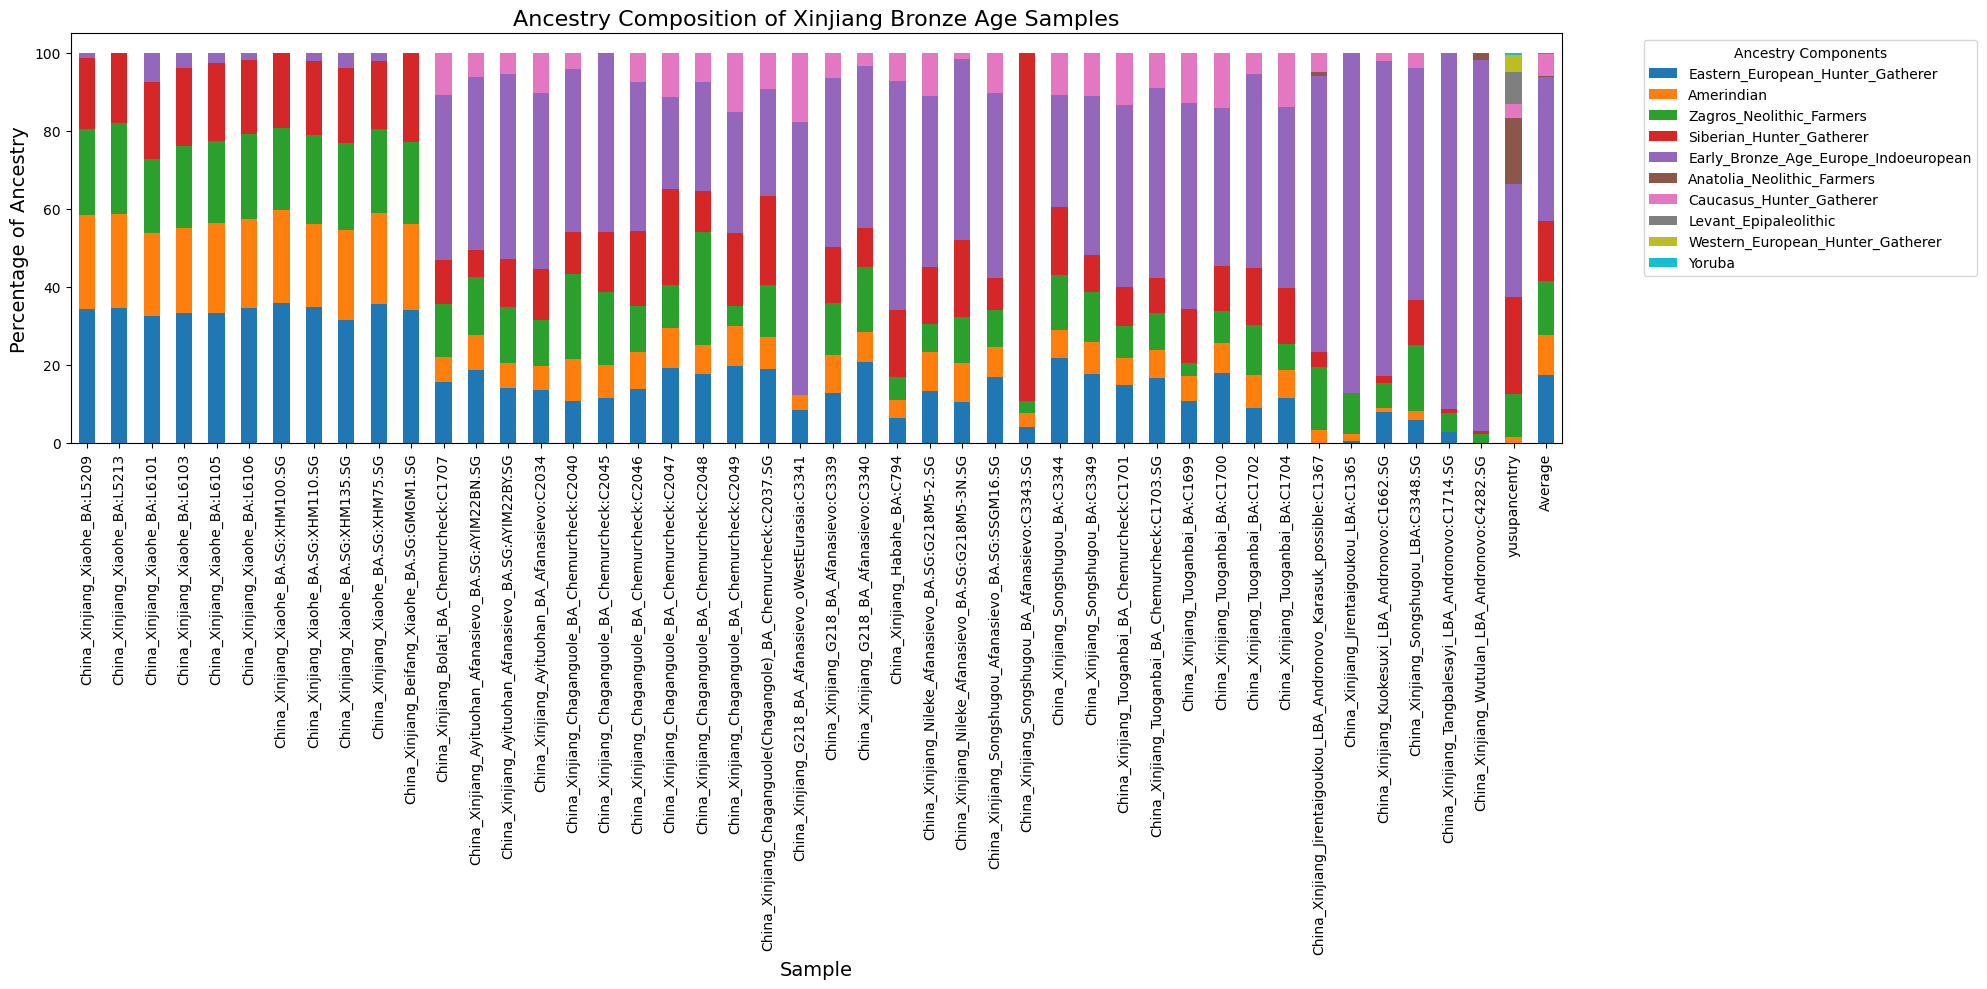

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual CSV file)
data = pd.read_csv('output.csv')

# Define the columns for ancestry components
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Siberian_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
data.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Xinjiang Bronze Age Samples', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Data as a string
data = """Target,Distance,Amerindian,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Eastern_European_Hunter_Gatherer,Levant_Epipaleolithic,North_Africa_Epipaleolithic,Siberian_Hunter_Gatherer,Western_European_Hunter_Gatherer,Yoruba,Zagros_Neolithic_Farmers
China_Xinjiang_Xiaohe_BA:L5209,0.20618299,24.0,0.0,0.0,1.4,34.4,0.0,0.0,18.2,0.0,0.0,22.0
China_Xinjiang_Xiaohe_BA:L5213,0.19840075,24.0,0.0,0.0,0.0,34.6,0.0,0.0,18.0,0.0,0.0,23.4
China_Xinjiang_Xiaohe_BA:L6101,0.18298817,21.2,0.0,0.0,7.0,32.8,0.0,0.0,19.8,0.0,0.0,19.2
China_Xinjiang_Xiaohe_BA:L6103,0.19897374,22.0,0.0,0.0,3.8,33.2,0.0,0.0,20.2,0.0,0.0,20.8
China_Xinjiang_Xiaohe_BA:L6105,0.20897197,23.2,0.0,0.0,2.6,33.2,0.0,0.0,20.0,0.0,0.0,21.0
China_Xinjiang_Xiaohe_BA:L6106,0.19634048,22.8,0.0,0.0,1.8,34.6,0.0,0.0,19.0,0.0,0.0,21.8
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.20210203,23.6,0.0,0.0,0.0,36.0,0.0,0.0,19.2,0.0,0.0,21.2
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.19498016,21.4,0.0,0.0,2.2,34.8,0.0,0.0,18.8,0.0,0.0,22.8
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.19453649,23.0,0.0,0.0,4.0,31.6,0.0,0.0,19.2,0.0,0.0,22.2
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.20782666,23.4,0.0,0.0,2.0,35.6,0.0,0.0,17.4,0.0,0.0,21.6
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.19207837,22.0,0.0,0.0,0.0,34.2,0.0,0.0,22.8,0.0,0.0,21.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10358884,6.4,0.0,10.8,42.4,15.6,0.0,0.0,11.2,0.0,0.0,13.6
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.09825104,8.8,0.0,6.2,44.4,18.8,0.0,0.0,6.8,0.0,0.0,15.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.09986119,6.6,0.0,5.4,47.4,14.0,0.0,0.0,12.4,0.0,0.0,14.2
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.08994669,6.2,0.0,10.2,45.2,13.6,0.0,0.0,13.2,0.0,0.0,11.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.10188766,10.8,0.0,4.2,41.6,10.8,0.0,0.0,10.8,0.0,0.0,21.8
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.09693696,8.6,0.0,0.0,45.8,11.4,0.0,0.0,15.6,0.0,0.0,18.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.11218144,9.6,0.0,7.6,38.0,13.8,0.0,0.0,19.4,0.0,0.0,11.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.10854949,10.2,0.0,11.4,23.4,19.2,0.0,0.0,24.6,0.0,0.0,11.2
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10077308,7.6,0.0,7.4,28.0,17.6,0.0,0.0,10.4,0.0,0.0,29.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.10284658,10.2,0.0,15.2,31.0,19.8,0.0,0.0,18.8,0.0,0.0,5.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10119117,8.2,0.0,9.2,27.6,19.0,0.0,0.0,22.8,0.0,0.0,13.2
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08198052,4.0,0.0,17.8,69.8,8.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.10720997,9.8,0.0,6.4,43.4,12.8,0.0,0.0,14.4,0.0,0.0,13.2
China_Xinjiang_G218_BA_Afanasievo:C3340,0.08885191,7.6,0.0,3.4,41.4,20.8,0.0,0.0,10.2,0.0,0.0,16.6
China_Xinjiang_Habahe_BA:C794,0.07646363,4.6,0.0,7.2,58.8,6.4,0.0,0.0,17.0,0.0,0.0,6.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.11250853,10.2,0.0,11.0,43.6,13.4,0.0,0.0,14.6,0.0,0.0,7.2
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.10473434,10.0,0.0,1.6,46.4,10.4,0.0,0.0,19.6,0.0,0.0,12.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.11517787,7.8,0.0,10.4,47.6,16.8,0.0,0.0,8.2,0.0,0.0,9.2
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04073556,3.6,0.0,0.0,0.0,4.2,0.0,0.0,89.2,0.0,0.0,3.0
China_Xinjiang_Songshugou_BA:C3344,0.10278829,7.2,0.0,10.8,28.6,21.8,0.0,0.0,17.6,0.0,0.0,14.0
China_Xinjiang_Songshugou_BA:C3349,0.11490959,8.0,0.0,11.2,40.4,18.0,0.0,0.0,9.4,0.0,0.0,13.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09002086,7.0,0.0,13.4,46.6,14.8,0.0,0.0,10.0,0.0,0.0,8.2
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09404769,7.2,0.0,9.0,49.0,16.4,0.0,0.0,9.0,0.0,0.0,9.4
China_Xinjiang_Tuoganbai_BA:C1699,0.09959228,6.4,0.0,12.8,52.8,10.8,0.0,0.0,14.0,0.0,0.0,3.2
China_Xinjiang_Tuoganbai_BA:C1700,0.10505185,7.6,0.0,14.2,40.4,18.0,0.0,0.0,11.6,0.0,0.0,8.2
China_Xinjiang_Tuoganbai_BA:C1702,0.08891918,8.4,0.0,5.4,49.8,9.0,0.0,0.0,14.6,0.0,0.0,12.8
China_Xinjiang_Tuoganbai_BA:C1704,0.10721369,7.2,0.0,13.8,46.6,11.6,0.0,0.0,14.2,0.0,0.0,6.6
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02937579,3.4,1.0,5.0,70.8,0.0,0.0,0.0,3.6,0.0,0.0,16.2
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02977965,2.0,0.0,0.0,87.2,0.4,0.0,0.0,0.0,0.0,0.0,10.4
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03122842,1.0,0.0,2.0,80.8,8.0,0.0,0.0,1.8,0.0,0.0,6.4
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03319035,2.4,0.0,3.8,59.6,5.8,0.0,0.0,11.4,0.0,0.0,17.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,0.0,0.0,0.0,91.4,2.8,0.0,0.0,1.0,0.0,0.0,4.8
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,1.8,0.0,95.2,0.0,0.0,0.0,0.6,0.0,0.0,2.4
Uygur:GRC10041341_Uygur06,0.08976512,0.0,15.0,4.6,0.0,0.0,0.0,1.2,64.0,2.6,0.0,12.6
Uygur:GRC10041342_Uygur12,0.06365158,0.4,11.2,3.6,15.8,0.0,0.0,0.0,45.6,0.0,0.0,23.4
Uygur:GRC10045054_Uygur13,0.08150544,0.0,8.2,6.8,14.2,0.0,1.2,0.8,47.4,2.6,0.0,18.8
Uygur:GRC10045055_Uygur14,0.07595639,0.0,13.6,7.0,3.2,0.0,0.0,0.0,54.8,3.2,0.0,18.2
Uygur:GRC10045056_Uygur16,0.09420424,0.0,14.6,9.0,0.0,0.0,0.6,0.0,61.4,3.0,0.0,11.4
Uygur:GRC10045057_Uygur18,0.06484919,0.8,10.4,9.4,14.2,0.0,0.0,0.0,42.6,1.0,0.0,21.6
Uygur:GRC10045058_Uygur31,0.06272991,0.0,11.6,0.0,17.4,0.0,0.0,0.0,46.2,0.8,0.0,24.0
Uygur:GRC10045060_Uygur33,0.06955714,0.4,12.6,7.8,7.8,0.0,2.0,0.0,51.0,3.0,0.6,14.8
Uygur:GRC10045061_Uygur41,0.11092189,0.0,11.2,0.0,0.0,0.0,1.0,1.8,66.6,2.2,0.0,17.2
Uygur:GRC10045064_Uygur49,0.09009194,0.0,12.6,8.4,0.0,0.0,2.0,0.0,60.2,2.8,0.0,14.0
Uygur:GRC10045065_Uygur53,0.07382992,0.0,8.0,1.6,16.4,0.0,0.0,0.8,50.0,1.6,0.0,21.6
Uygur:GRC10045066_Uygur55,0.07656304,0.0,12.8,6.4,1.0,0.0,0.0,0.0,56.8,5.2,0.0,17.8
Uygur:HGDP01297,0.07682293,0.0,11.6,7.0,9.2,0.0,1.2,0.0,50.8,2.0,0.0,18.2
Uygur:HGDP01298,0.06904984,0.0,10.2,7.4,11.4,0.0,1.6,0.2,47.2,2.2,0.0,19.8
Uygur:HGDP01299,0.08101489,0.0,12.8,3.8,7.2,0.0,0.0,0.0,54.8,2.6,0.0,18.8
Uygur:HGDP01300,0.06235100,0.0,10.8,4.0,10.8,0.0,0.0,0.0,51.0,2.4,0.0,21.0
Uygur:HGDP01301,0.07159276,0.0,12.0,4.4,3.4,0.0,0.0,1.4,55.0,4.4,0.0,19.4
yusupancentry,0.09729617,1.6,16.8,3.8,29.0,0.0,8.2,0.0,24.8,4.2,0.6,11.0
Average,0.10382964,7.6,3.5,5.5,28.9,12.6,0.3,0.1,25.8,0.7,0.0,14.9


"""

# Convert the string data to a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Save as CSV
df.to_csv("output.csv", index=False)

print("CSV file saved as 'output.csv'")


CSV file saved as 'output.csv'


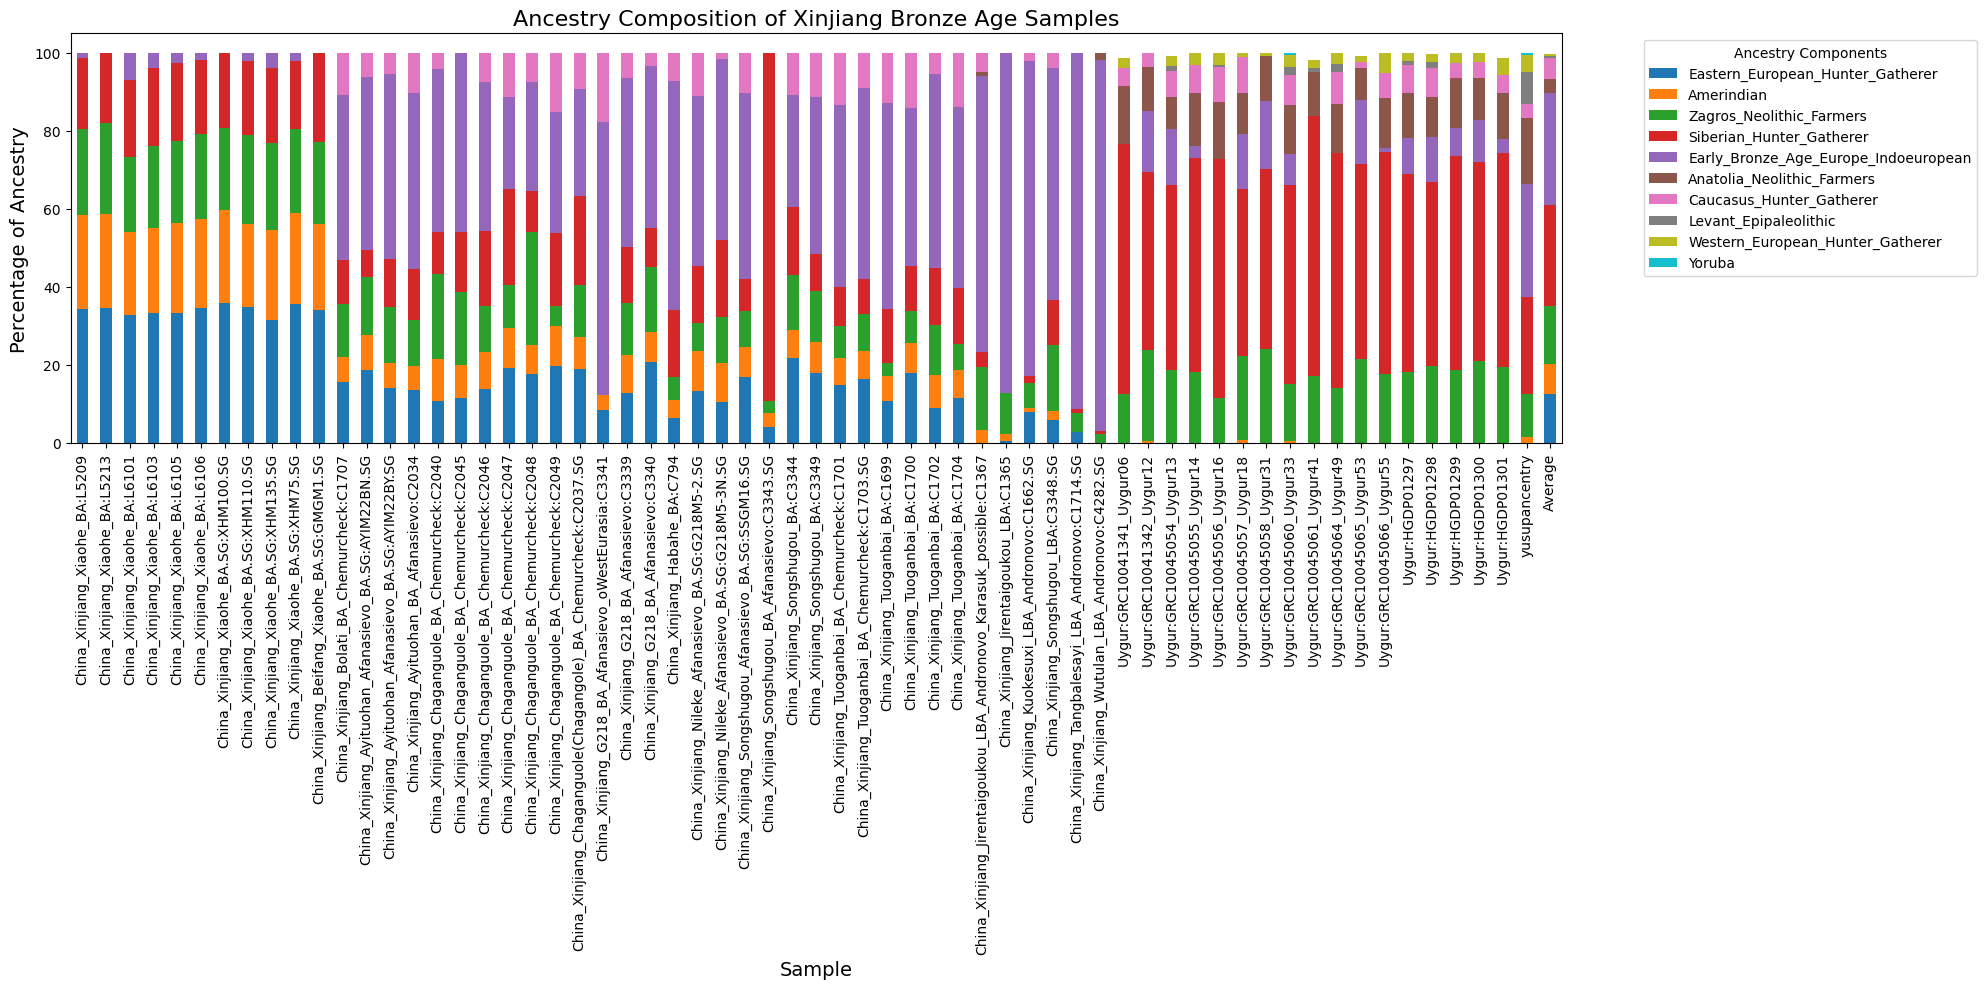

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual CSV file)
data = pd.read_csv('output.csv')

# Define the columns for ancestry components
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Siberian_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
data.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Xinjiang Bronze Age Samples', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Data as a string
data = """Target,Distance,Eastern_European_Hunter_Gatherer,Amerindian,Zagros_Neolithic_Farmers,Siberian_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Levant_Epipaleolithic,North_Africa_Epipaleolithic,Western_European_Hunter_Gatherer,Yoruba
China_Xinjiang_Xiaohe_BA:L5209,0.20618299,34.4,24.0,22.0,18.2,1.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L5213,0.19840075,34.6,24.0,23.4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6101,0.18298787,32.6,21.2,19.0,19.8,7.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6103,0.19897374,33.2,22.0,20.8,20.2,3.8,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6105,0.20897197,33.2,23.2,21.0,20.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6106,0.19634048,34.6,22.8,21.8,19.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.20210203,36.0,23.6,21.2,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.19498016,34.8,21.4,22.8,18.8,2.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.19453692,31.4,23.0,22.0,19.2,4.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.20782666,35.6,23.4,21.6,17.4,2.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.19207837,34.2,22.0,21.0,22.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10358884,15.6,6.4,13.6,11.2,42.4,0.0,10.8,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.09825104,18.8,8.8,15.0,6.8,44.4,0.0,6.2,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.09986119,14.0,6.6,14.2,12.4,47.4,0.0,5.4,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.08994669,13.6,6.2,11.6,13.2,45.2,0.0,10.2,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.10188766,10.8,10.8,21.8,10.8,41.6,0.0,4.2,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.09693696,11.4,8.6,18.6,15.6,45.8,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.11218144,13.8,9.6,11.6,19.4,38.0,0.0,7.6,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.10854949,19.2,10.2,11.2,24.6,23.4,0.0,11.4,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10077308,17.6,7.6,29.0,10.4,28.0,0.0,7.4,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.10284658,19.8,10.2,5.0,18.8,31.0,0.0,15.2,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10119117,19.0,8.2,13.2,22.8,27.6,0.0,9.2,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08198052,8.4,4.0,0.0,0.0,69.8,0.0,17.8,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.10720997,12.8,9.8,13.2,14.4,43.4,0.0,6.4,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3340,0.08885191,20.8,7.6,16.6,10.2,41.4,0.0,3.4,0.0,0.0,0.0,0.0
China_Xinjiang_Habahe_BA:C794,0.07646363,6.4,4.6,6.0,17.0,58.8,0.0,7.2,0.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.11250852,13.2,10.2,7.0,14.6,44.0,0.0,11.0,0.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.10473434,10.4,10.0,12.0,19.6,46.4,0.0,1.6,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.11517787,16.8,7.8,9.2,8.2,47.6,0.0,10.4,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04073556,4.2,3.6,3.0,89.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3344,0.10278829,21.8,7.2,14.0,17.6,28.6,0.0,10.8,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3349,0.11490991,17.8,8.0,13.0,9.4,40.8,0.0,11.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09002086,14.8,7.0,8.2,10.0,46.6,0.0,13.4,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09404769,16.4,7.2,9.4,9.0,49.0,0.0,9.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1699,0.09959228,10.8,6.4,3.2,14.0,52.8,0.0,12.8,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1700,0.10505185,18.0,7.6,8.2,11.6,40.4,0.0,14.2,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1702,0.08892035,9.2,8.4,13.0,14.6,49.4,0.0,5.4,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1704,0.10721369,11.6,7.2,6.6,14.2,46.6,0.0,13.8,0.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02937579,0.0,3.4,16.2,3.6,70.8,1.0,5.0,0.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02977965,0.4,2.0,10.4,0.0,87.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03122842,8.0,1.0,6.4,1.8,80.8,0.0,2.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03319035,5.8,2.4,17.0,11.4,59.6,0.0,3.8,0.0,0.0,0.0,0.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,2.8,0.0,4.8,1.0,91.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,0.0,2.4,0.6,95.2,1.8,0.0,0.0,0.0,0.0,0.0
Uygur:GRC10041341_Uygur06,0.08976512,0.0,0.0,12.6,64.0,0.0,15.0,4.6,0.0,1.2,2.6,0.0
Uygur:GRC10041342_Uygur12,0.06365158,0.0,0.4,23.4,45.6,15.8,11.2,3.6,0.0,0.0,0.0,0.0
Uygur:GRC10045054_Uygur13,0.08150544,0.0,0.0,18.8,47.4,14.2,8.2,6.8,1.2,0.8,2.6,0.0
Uygur:GRC10045055_Uygur14,0.07595639,0.0,0.0,18.2,54.8,3.2,13.6,7.0,0.0,0.0,3.2,0.0
Uygur:GRC10045056_Uygur16,0.09420424,0.0,0.0,11.4,61.4,0.0,14.6,9.0,0.6,0.0,3.0,0.0
Uygur:GRC10045057_Uygur18,0.06484919,0.0,0.8,21.6,42.6,14.2,10.4,9.4,0.0,0.0,1.0,0.0
Uygur:GRC10045058_Uygur31,0.06272991,0.0,0.0,24.0,46.2,17.4,11.6,0.0,0.0,0.0,0.8,0.0
Uygur:GRC10045060_Uygur33,0.06955714,0.0,0.4,14.8,51.0,7.8,12.6,7.8,2.0,0.0,3.0,0.6
Uygur:GRC10045061_Uygur41,0.11092189,0.0,0.0,17.2,66.6,0.0,11.2,0.0,1.0,1.8,2.2,0.0
Uygur:GRC10045064_Uygur49,0.09009194,0.0,0.0,14.0,60.2,0.0,12.6,8.4,2.0,0.0,2.8,0.0
Uygur:GRC10045065_Uygur53,0.07382992,0.0,0.0,21.6,50.0,16.4,8.0,1.6,0.0,0.8,1.6,0.0
Uygur:GRC10045066_Uygur55,0.07656304,0.0,0.0,17.8,56.8,1.0,12.8,6.4,0.0,0.0,5.2,0.0
Uygur:HGDP01297,0.07682293,0.0,0.0,18.2,50.8,9.2,11.6,7.0,1.2,0.0,2.0,0.0
Uygur:HGDP01298,0.06904984,0.0,0.0,19.8,47.2,11.4,10.2,7.4,1.6,0.2,2.2,0.0
Uygur:HGDP01299,0.08101489,0.0,0.0,18.8,54.8,7.2,12.8,3.8,0.0,0.0,2.6,0.0
Uygur:HGDP01300,0.06235100,0.0,0.0,21.0,51.0,10.8,10.8,4.0,0.0,0.0,2.4,0.0
Uygur:HGDP01301,0.07159276,0.0,0.0,19.4,55.0,3.4,12.0,4.4,0.0,1.4,4.4,0.0
yusupancentry,0.09729617,0.0,1.6,11.0,24.8,29.0,16.8,3.8,8.2,0.0,4.2,0.6
Han_Chongqing:Han1968,0.27254993,0.0,0.0,0.0,97.0,0.0,0.0,0.0,1.4,0.0,0.0,1.6
Han_Chongqing:Han2150,0.27276437,0.0,0.0,0.0,97.6,0.0,0.0,0.0,0.6,0.0,0.0,1.8
Han_Chongqing:Han516,0.27721344,0.0,0.0,0.0,96.4,0.0,0.0,0.0,1.6,0.0,0.0,2.0
Han_Fujian:Han1467,0.28513376,0.0,0.0,0.0,96.4,0.0,0.0,0.0,1.2,1.0,0.0,1.4
Han_Fujian:Han1619,0.27840571,0.0,0.0,0.0,95.6,0.0,0.0,0.0,2.4,0.0,0.0,2.0
Han_Fujian:Han1900,0.26936294,0.0,0.0,0.0,97.4,0.0,0.0,0.0,0.0,0.0,0.0,2.6
Han_Fujian:Han1934,0.27918767,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.8,0.0,0.0,2.0
Han_Fujian:Han1994,0.27730507,0.0,0.0,0.0,96.6,0.0,0.0,0.0,1.4,0.0,0.0,2.0
Han_Guangdong:Han1207,0.27448583,0.0,0.0,0.0,97.2,0.0,0.0,0.0,2.2,0.0,0.0,0.6
Han_Guangdong:Han1235,0.29099922,0.0,0.0,0.0,96.2,0.0,0.0,0.0,1.0,0.0,0.0,2.8
Han_Guangdong:Han1415,0.29738010,0.0,0.0,0.0,94.8,0.0,0.0,0.0,3.4,0.0,0.0,1.8
Han_Guangdong:Han1432,0.30058060,0.0,0.0,0.0,96.0,0.0,0.0,0.0,1.8,0.0,0.0,2.2
Han_Guangdong:Han1434,0.28450520,0.0,0.0,0.0,94.4,0.0,0.0,0.0,3.6,0.0,0.0,2.0
Han_Guangdong:Han2087,0.28937762,0.0,0.0,0.0,96.8,0.0,0.0,0.0,1.2,0.0,0.0,2.0
Han_Guangdong:Han2088,0.29769649,0.0,0.0,0.0,95.0,0.0,0.0,0.0,2.6,0.0,0.0,2.4
Han_Guizhou:3240_32731808175485.ped,0.26799881,0.0,0.0,0.0,97.0,0.0,0.0,0.0,2.6,0.0,0.0,0.4
Han_Guizhou:3240_39771808186953.ped,0.26485040,0.0,0.0,0.0,97.0,0.0,0.0,0.0,1.4,0.0,0.0,1.6
Han_Guizhou:3240_58781808175701.ped,0.24912014,0.0,0.0,0.0,96.6,0.0,0.0,0.0,0.8,1.4,0.0,1.2
Han_Guizhou:3241_34671808175734.ped,0.27273923,0.0,0.0,0.0,96.8,0.0,0.0,0.0,1.2,0.8,0.0,1.2
Han_Guizhou:3241_64451808176615.ped,0.26379061,0.0,0.0,0.0,96.4,0.0,0.0,0.0,0.0,2.4,0.0,1.2
Han_Guizhou:3242_25461808178912.ped,0.27158492,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Han_Guizhou:3242_42311808189234.ped,0.26056656,0.0,0.0,0.0,97.4,0.0,0.0,0.0,1.0,0.0,0.0,1.6
Han_Guizhou:3242_69791808179035.ped,0.26251635,0.0,0.0,0.0,97.6,0.0,0.0,0.0,0.2,0.0,0.0,2.2
Han_Guizhou:3243_32481808175474.ped,0.26643148,0.0,0.0,0.0,96.2,0.0,0.0,0.0,2.4,0.0,0.0,1.4
Han_Guizhou:3243_45551808189658.ped,0.26929494,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.6,0.0,0.0,1.4
Han_Guizhou:3243_64351808176770.ped,0.26914867,0.0,0.0,0.0,97.4,0.0,0.0,0.0,0.8,0.0,0.0,1.8
Han_Guizhou:3243_73321808176737.ped,0.26681958,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,0.0,0.0,1.2
Han_Guizhou:3247_73661808176785.ped,0.26928343,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.0,2.2,0.0,0.6
Han_Guizhou:3324_40321808178750.ped,0.27897082,0.0,0.0,0.0,95.6,0.0,0.0,0.0,1.6,0.6,0.0,2.2
Han_Henan:Han1226,0.23057577,0.0,0.0,0.0,97.0,0.0,0.0,0.0,2.2,0.0,0.0,0.8
Han_Henan:Han1243,0.23453519,0.0,0.0,0.0,97.2,0.0,0.0,0.0,2.0,0.0,0.0,0.8
Han_Henan:Han1713,0.24300968,0.0,0.0,0.0,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.6
Han_Henan:Han1714,0.24763594,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Henan:Han894,0.24650295,0.0,0.0,0.0,97.6,0.0,0.0,0.0,1.6,0.0,0.0,0.8
Han_Hubei:Han2161,0.25779492,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6
Han_Hubei:Han2162,0.26219728,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,1.4,0.0,0.6
Han_Hubei:Han788,0.27740446,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.6,0.0,0.0,2.2
Han_Hubei:Han789,0.26749334,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.4,0.0,1.2
Han_Hubei:Han874,0.26497588,0.0,0.0,0.0,96.2,0.0,0.0,0.0,1.8,0.0,0.0,2.0
Han_Jiangsu:Han1452,0.25835263,0.0,0.0,0.0,97.8,0.0,0.0,0.0,0.4,0.0,0.0,1.8
Han_Jiangsu:Han1962,0.25749174,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.4
Han_Jiangsu:Han2054,0.26049725,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Jiangsu:Han2057,0.25706528,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,0.0,0.0,1.2
Han_Jiangsu:Han2058,0.25469804,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Jiangsu:Han2076,0.26251076,0.0,0.0,0.0,97.2,0.0,0.0,0.0,2.0,0.0,0.0,0.8
Han_Jiangsu:Han2090,0.25855762,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.6,0.0,0.0,1.0
Han_Shandong:Han1329,0.23219378,0.0,0.0,0.0,98.6,0.0,0.0,0.0,0.4,0.0,0.0,1.0
Han_Shandong:Han1616,0.24032493,0.0,0.0,0.0,98.6,0.0,0.0,0.0,0.6,0.2,0.0,0.6
Han_Shandong:Han1840,0.23978217,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,0.0,0.0,1.2
Han_Shandong:Han1916,0.24606157,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Han_Shandong:Han1978,0.25039217,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.2,0.0,0.0,1.8
Han_Shandong:Han220,0.24220994,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Shandong:Han25,0.24297737,0.0,0.0,0.0,97.8,0.0,0.0,0.0,0.0,0.0,0.0,2.2
Han_Shandong:Han4,0.24883182,0.0,0.0,0.0,98.6,0.0,0.0,0.0,0.0,0.0,0.0,1.4
Han_Shandong:Han853,0.23736590,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Shanghai:Han24,0.26311742,0.0,0.0,0.0,98.4,0.0,0.0,0.0,1.2,0.0,0.0,0.4
Han_Shanghai:Han496,0.25330569,0.0,0.0,0.0,97.6,0.0,0.0,0.0,1.6,0.0,0.0,0.8
Han_Shanxi:Han115,0.23525190,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.4
Han_Shanxi:Han1603,0.22481019,0.0,0.0,0.0,97.4,0.0,0.0,0.0,2.2,0.0,0.0,0.4
Han_Shanxi:Han1843,0.23534677,0.0,0.0,0.0,98.2,0.0,0.0,0.0,0.8,0.0,0.0,1.0
Han_Shanxi:Han1897,0.22834589,0.0,0.0,0.0,97.4,0.0,0.0,0.0,1.4,0.0,0.0,1.2
Han_Shanxi:Han1899,0.22198507,0.0,0.0,0.0,98.6,0.0,0.0,0.0,0.0,0.2,0.0,1.2
Han_Shanxi:Han1970,0.24591640,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,0.0,0.0,1.2
Han_Shanxi:Han790,0.24216280,0.0,0.0,0.0,95.8,0.0,0.0,0.0,0.4,2.0,0.0,1.8
Han_Shanxi:Han855,0.23356990,0.0,0.0,0.0,96.4,0.0,0.0,0.0,2.6,0.0,0.0,1.0
Han_Sichuan:Han1709,0.25378686,0.0,0.0,0.0,96.6,0.0,0.0,0.0,0.2,1.6,0.0,1.6
Han_Sichuan:Han1917,0.26809899,0.0,0.0,0.0,96.4,0.0,0.0,0.0,2.0,0.0,0.0,1.6
Han_Sichuan:Han2044,0.25425287,0.0,0.0,0.0,97.0,0.0,0.0,0.0,1.8,0.0,0.0,1.2
Han_Sichuan:Han2145,0.26198366,0.0,0.0,0.0,96.8,0.0,0.0,0.0,1.4,0.0,0.0,1.8
Han_Sichuan:Han2147,0.27898129,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,1.8,0.0,2.2
Han_Sichuan:Han2151,0.26729980,0.0,0.0,0.0,96.4,0.0,0.0,0.0,0.0,2.4,0.0,1.2
Han_Sichuan:Han2155,0.26600876,0.0,0.0,0.0,97.4,0.0,0.0,0.0,1.0,0.0,0.0,1.6
Han_Zhejiang:Han192,0.26988431,0.0,0.0,0.0,98.6,0.0,0.0,0.0,0.0,0.0,0.0,1.4
Han_Zhejiang:Han278,0.27002044,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.6,0.0,1.0
Han_Zhejiang:Han53,0.26580570,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Zhejiang:Han605,0.25435969,0.0,0.0,0.0,98.4,0.0,0.0,0.0,0.0,0.0,0.0,1.6
Han_Zhejiang:Han993,0.26557463,0.0,0.0,0.0,95.6,0.0,0.0,0.0,3.0,0.0,0.0,1.4
Average,0.19063892,5.6,3.4,6.7,65.5,12.9,1.6,2.5,0.6,0.2,0.3,0.8



"""

# Convert the string data to a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Save as CSV
df.to_csv("output.csv", index=False)

print("CSV file saved as 'output.csv'")


CSV file saved as 'output.csv'


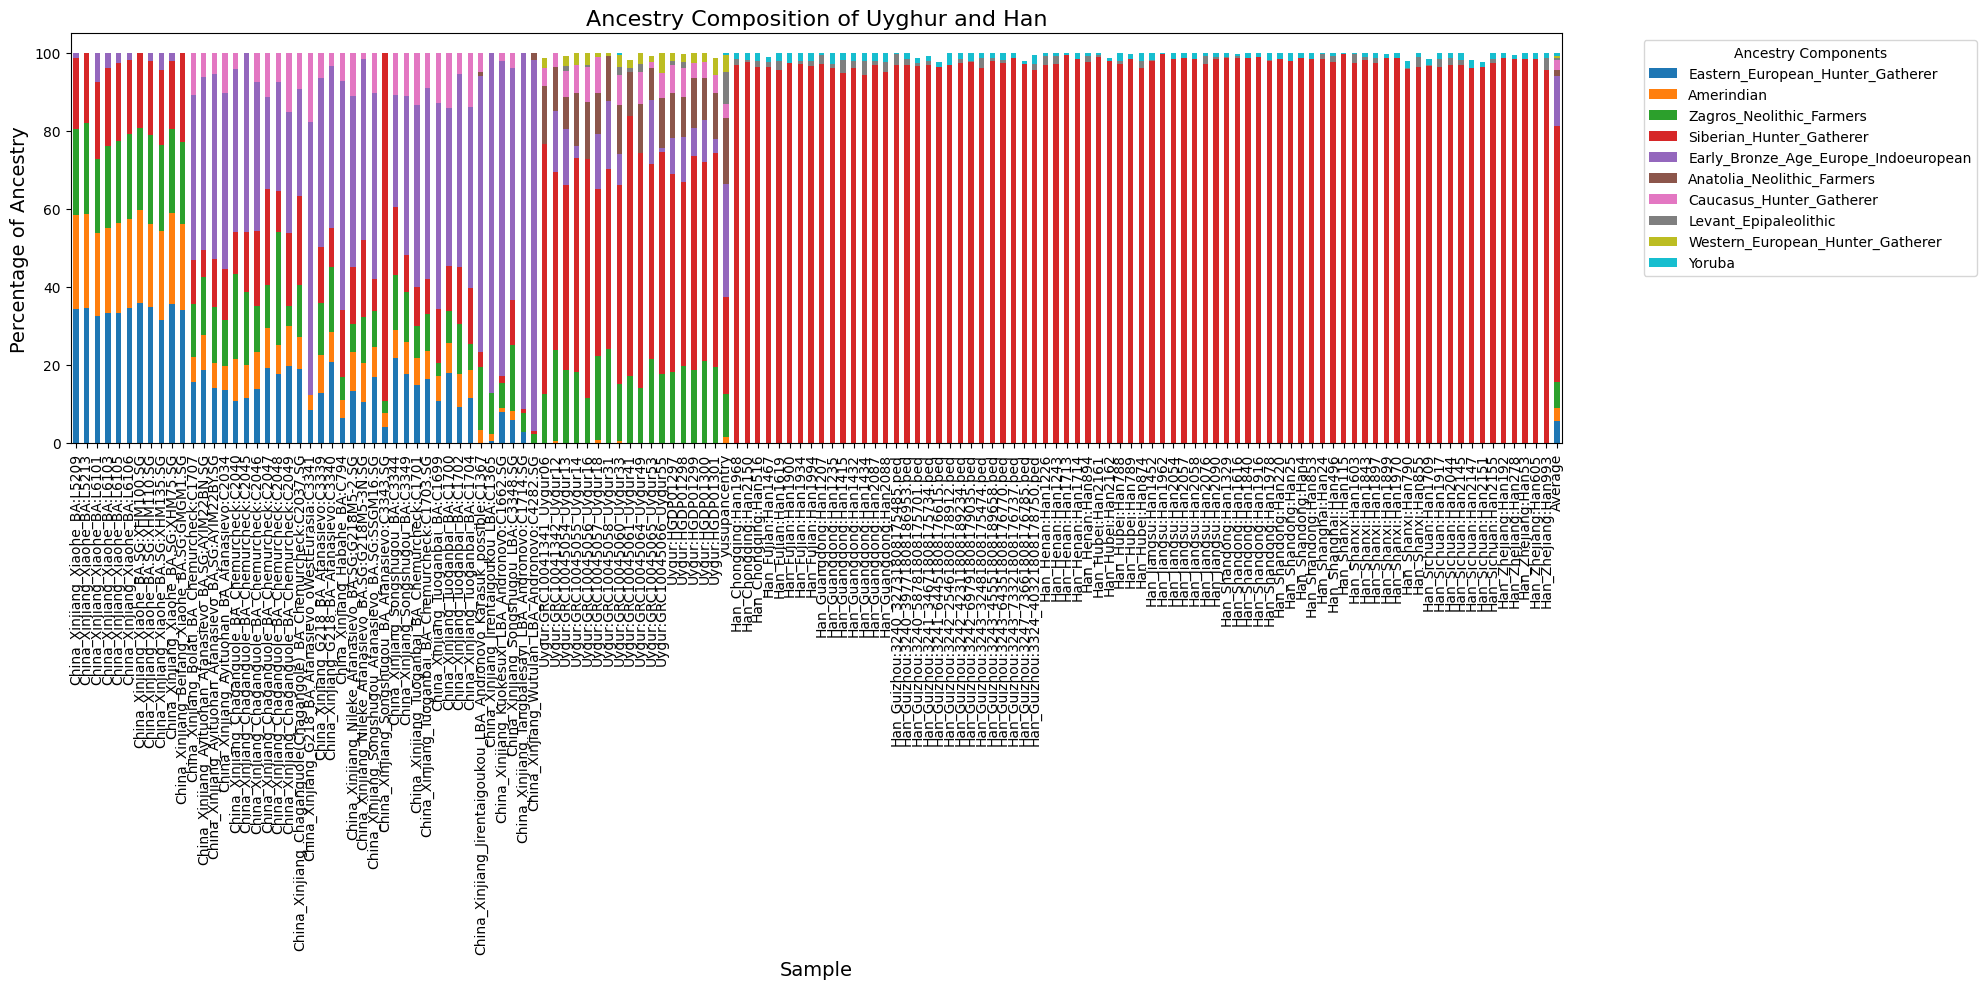

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual CSV file)
data = pd.read_csv('output.csv')

# Define the columns for ancestry components
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Siberian_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
data.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Uyghur and Han', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


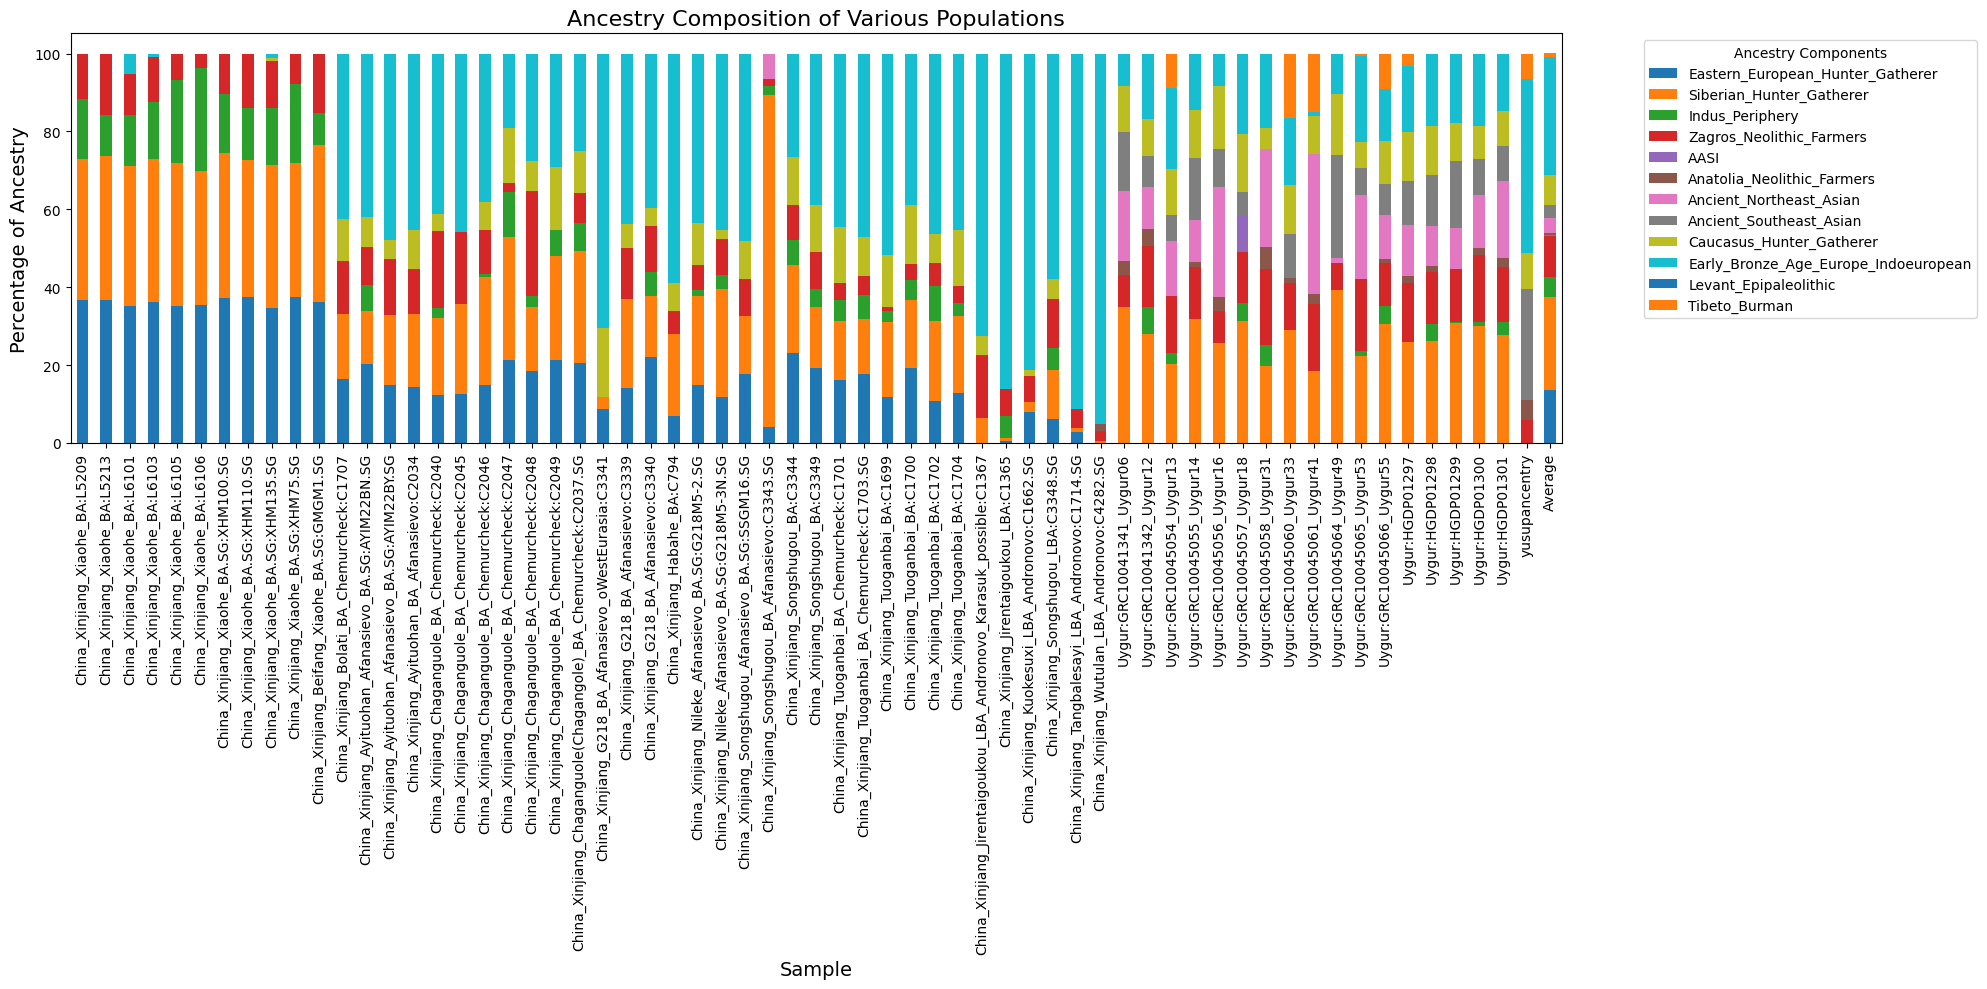

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the string into a DataFrame
from io import StringIO
data = """Target,Distance,Eastern_European_Hunter_Gatherer,Siberian_Hunter_Gatherer,Indus_Periphery,Zagros_Neolithic_Farmers,AASI,Anatolia_Neolithic_Farmers,Ancient_Northeast_Asian,Ancient_Southeast_Asian,Caucasus_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Levant_Epipaleolithic,Tibeto_Burman
China_Xinjiang_Xiaohe_BA:L5209,0.23194223,36.6,36.4,15.4,11.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L5213,0.22607301,36.6,37.2,10.4,15.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6101,0.20586788,35.2,36.0,13.0,10.6,0.0,0.0,0.0,0.0,0.0,5.2,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6103,0.22173806,36.2,36.8,14.6,11.6,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6105,0.23173976,35.2,36.6,21.4,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6106,0.21818444,35.4,34.4,26.4,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.22751405,37.2,37.2,15.2,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.21691428,37.4,35.2,13.4,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.21958340,34.6,36.8,14.6,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.23153005,37.4,34.4,20.4,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.21624630,36.2,40.4,8.2,15.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10759050,16.4,16.8,0.0,13.6,0.0,0.0,0.0,0.0,10.6,42.6,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.10566154,20.4,13.4,6.8,9.8,0.0,0.0,0.0,0.0,7.6,42.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.10422579,14.8,18.0,0.0,14.4,0.0,0.0,0.0,0.0,5.0,47.8,0.0,0.0
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.09437745,14.4,18.6,0.0,11.6,0.0,0.0,0.0,0.0,10.0,45.4,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.11310080,12.2,19.8,2.6,19.8,0.0,0.0,0.0,0.0,4.4,41.2,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.10445992,12.6,23.2,0.0,18.4,0.0,0.0,0.0,0.0,0.0,45.8,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.12026350,15.0,27.6,0.8,11.2,0.0,0.0,0.0,0.0,7.2,38.2,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.11671422,21.2,31.6,11.6,2.4,0.0,0.0,0.0,0.0,14.0,19.2,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10642372,18.6,16.4,2.8,27.0,0.0,0.0,0.0,0.0,7.6,27.6,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.11230406,21.4,26.6,6.6,0.0,0.0,0.0,0.0,0.0,16.4,29.0,0.0,0.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10718542,20.6,28.8,7.0,7.8,0.0,0.0,0.0,0.0,10.8,25.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08446056,8.8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,70.4,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.11627337,14.0,23.0,0.0,13.2,0.0,0.0,0.0,0.0,6.0,43.8,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3340,0.09498887,22.0,15.8,6.0,12.0,0.0,0.0,0.0,0.0,4.6,39.6,0.0,0.0
China_Xinjiang_Habahe_BA:C794,0.07936826,7.0,21.0,0.0,6.0,0.0,0.0,0.0,0.0,7.2,58.8,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.12152328,14.8,23.0,1.6,6.2,0.0,0.0,0.0,0.0,11.0,43.4,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.11405738,11.8,27.8,3.6,9.2,0.0,0.0,0.0,0.0,2.2,45.4,0.0,0.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.12037705,17.8,14.8,0.0,9.4,0.0,0.0,0.0,0.0,10.0,48.0,0.0,0.0
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04166747,4.0,85.4,2.4,1.8,0.0,0.0,6.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3344,0.10738389,23.0,22.8,6.4,9.0,0.0,0.0,0.0,0.0,12.2,26.6,0.0,0.0
China_Xinjiang_Songshugou_BA:C3349,0.12034842,19.2,15.6,4.8,9.4,0.0,0.0,0.0,0.0,12.0,39.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09519240,16.2,15.2,5.2,4.4,0.0,0.0,0.0,0.0,14.4,44.6,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09905713,17.6,14.2,6.2,4.8,0.0,0.0,0.0,0.0,10.2,47.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1699,0.10374283,11.8,19.2,2.8,1.0,0.0,0.0,0.0,0.0,13.4,51.8,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1700,0.11040766,19.2,17.4,5.2,4.2,0.0,0.0,0.0,0.0,15.2,38.8,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1702,0.09581416,10.8,20.4,9.2,5.8,0.0,0.0,0.0,0.0,7.6,46.2,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1704,0.11198591,12.8,19.8,3.4,4.2,0.0,0.0,0.0,0.0,14.4,45.4,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.03304731,0.0,6.4,0.0,16.2,0.0,0.0,0.0,0.0,5.0,72.2,0.2,0.0
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.03050225,0.6,0.6,5.6,7.0,0.0,0.0,0.0,0.0,0.0,86.2,0.0,0.0
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03156569,8.0,2.6,0.0,6.6,0.0,0.0,0.0,0.0,1.6,81.2,0.0,0.0
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03393299,6.2,12.6,5.6,12.6,0.0,0.0,0.0,0.0,5.0,58.0,0.0,0.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,2.8,1.0,0.0,4.8,0.0,0.0,0.0,0.0,0.0,91.4,0.0,0.0
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,0.6,0.0,2.4,0.0,1.8,0.0,0.0,0.0,95.2,0.0,0.0
Uygur:GRC10041341_Uygur06,0.05554609,0.0,34.8,0.0,8.4,0.0,3.6,17.8,15.2,11.8,8.4,0.0,0.0
Uygur:GRC10041342_Uygur12,0.04624120,0.0,28.0,6.8,15.8,0.0,4.4,10.8,7.8,9.6,16.8,0.0,0.0
Uygur:GRC10045054_Uygur13,0.05573637,0.0,20.4,2.6,14.8,0.0,0.0,14.0,6.8,11.8,20.8,0.0,8.8
Uygur:GRC10045055_Uygur14,0.04686502,0.0,31.8,0.0,13.4,0.0,1.4,10.6,16.0,12.2,14.6,0.0,0.0
Uygur:GRC10045056_Uygur16,0.05609023,0.0,25.8,0.0,8.0,0.0,3.8,28.2,9.6,16.2,8.4,0.0,0.0
Uygur:GRC10045057_Uygur18,0.04622298,0.0,31.4,4.6,13.0,9.4,0.0,0.0,6.0,15.0,20.6,0.0,0.0
Uygur:GRC10045058_Uygur31,0.03940786,0.0,19.8,5.4,19.4,0.0,5.8,25.0,0.0,5.4,19.2,0.0,0.0
Uygur:GRC10045060_Uygur33,0.04206010,0.0,29.0,0.0,12.2,0.0,1.2,0.0,11.2,12.6,17.2,0.0,16.6
Uygur:GRC10045061_Uygur41,0.06254024,0.0,18.4,0.0,17.2,0.0,2.6,36.0,0.0,9.8,1.0,0.0,15.0
Uygur:GRC10045064_Uygur49,0.05575853,0.0,39.2,0.0,7.0,0.0,0.0,1.2,26.6,15.6,10.4,0.0,0.0
Uygur:GRC10045065_Uygur53,0.04417693,0.0,22.4,1.2,18.6,0.0,0.0,21.4,7.0,6.8,22.0,0.0,0.6
Uygur:GRC10045066_Uygur55,0.05100421,0.0,30.6,4.6,11.0,0.0,1.0,11.4,8.0,11.0,13.4,0.0,9.0
Uygur:HGDP01297,0.04988577,0.0,26.0,0.0,15.0,0.0,1.8,13.2,11.4,12.4,17.0,0.0,3.2
Uygur:HGDP01298,0.04301599,0.0,26.2,4.4,13.2,0.0,1.6,10.2,13.2,12.6,18.6,0.0,0.0
Uygur:HGDP01299,0.05075558,0.0,30.8,0.2,13.6,0.0,0.0,10.6,17.2,9.8,17.8,0.0,0.0
Uygur:HGDP01300,0.03904201,0.0,30.0,1.0,17.2,0.0,2.0,13.4,9.4,8.4,18.6,0.0,0.0
Uygur:HGDP01301,0.03949255,0.0,27.8,3.2,14.2,0.0,2.4,19.6,9.2,8.8,14.8,0.0,0.0
yusupancentry,0.05033085,0.0,0.0,0.0,6.0,0.0,5.0,0.0,28.6,9.2,44.8,0.0,6.4
Average,0.10212932,13.5,24.1,5.1,10.4,0.2,0.6,4.0,3.3,7.5,30.5,0.0,1.0

"""
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components based on the new dataset
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Siberian_Hunter_Gatherer', 'Indus_Periphery',
    'Zagros_Neolithic_Farmers', 'AASI', 'Anatolia_Neolithic_Farmers', 'Ancient_Northeast_Asian',
    'Ancient_Southeast_Asian', 'Caucasus_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Levant_Epipaleolithic', 'Tibeto_Burman'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
df.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Various Populations', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

# Optionally, save the plot if needed
# plt.savefig('ancestry_composition.png', dpi=300, bbox_inches='tight')

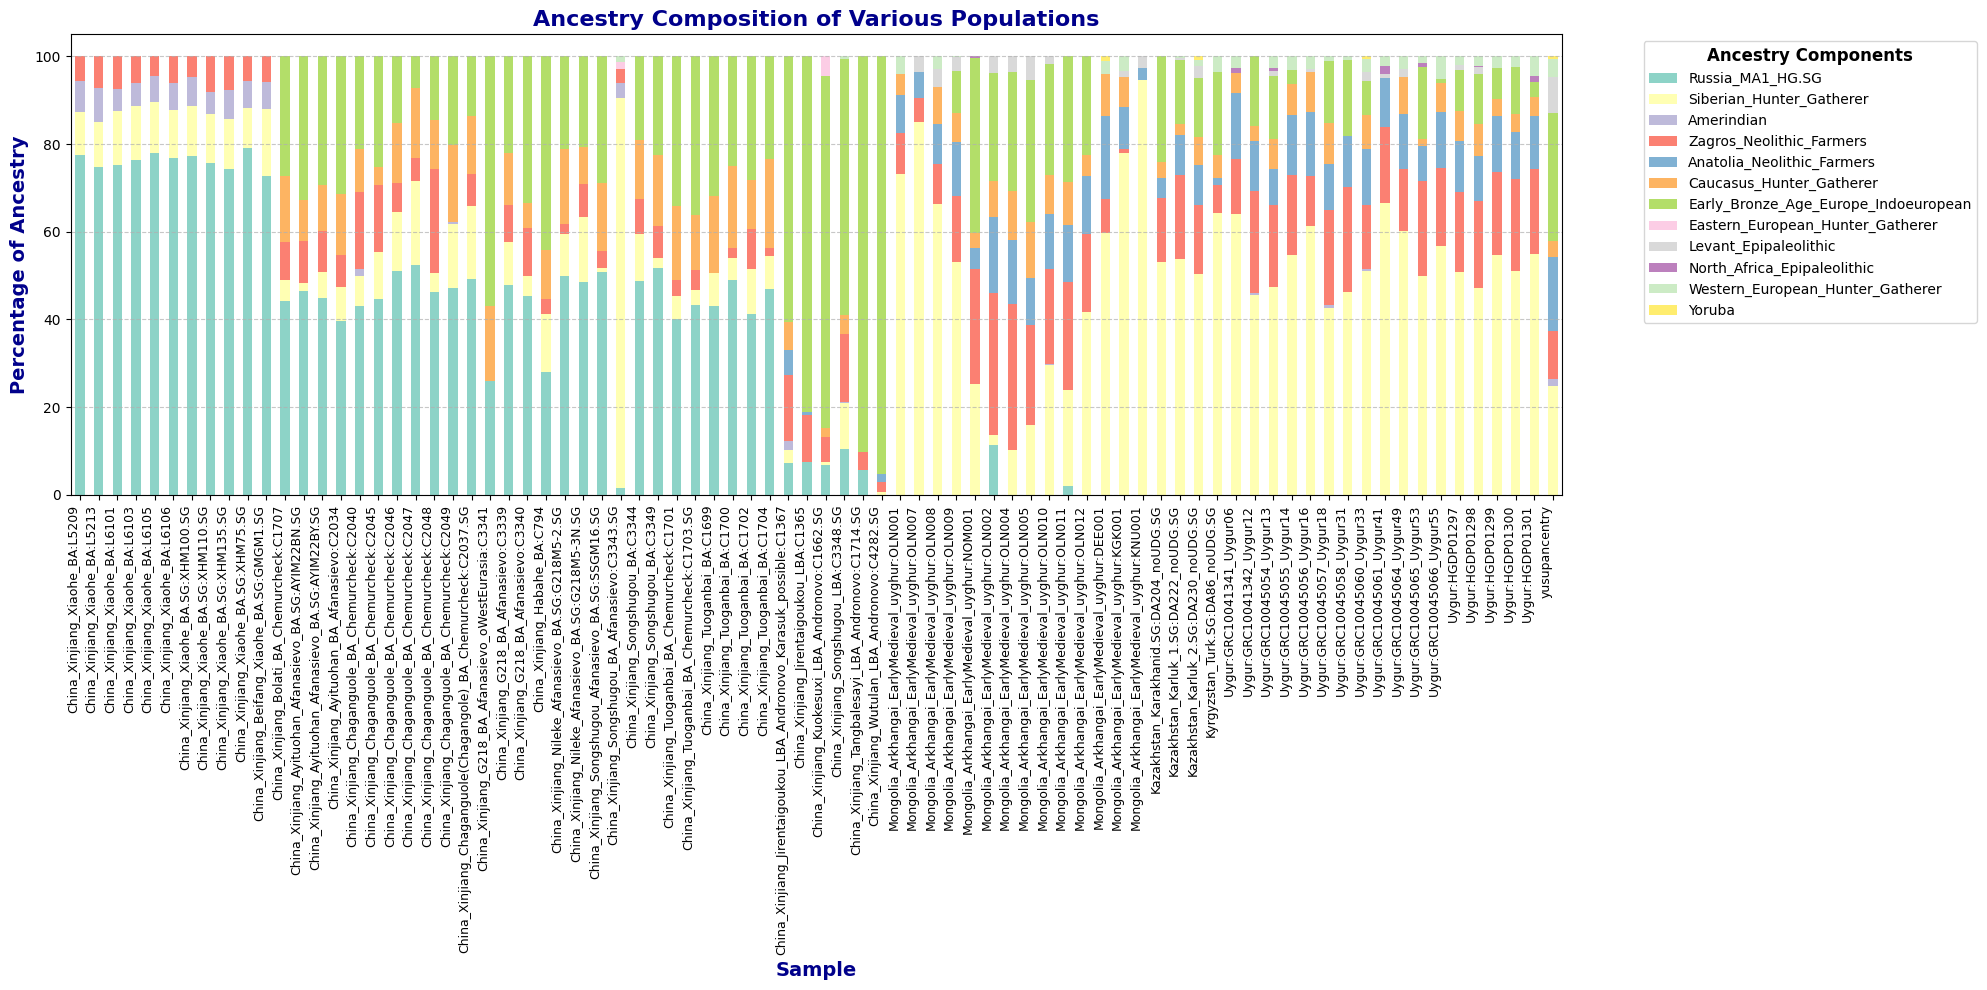

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the data from the string into a DataFrame
from io import StringIO
data = """Target,Distance,Russia_MA1_HG.SG,Siberian_Hunter_Gatherer,Amerindian,Zagros_Neolithic_Farmers,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Eastern_European_Hunter_Gatherer,Levant_Epipaleolithic,North_Africa_Epipaleolithic,Western_European_Hunter_Gatherer,Yoruba
China_Xinjiang_Xiaohe_BA:L5209,0.12382213,77.4,10.0,7.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L5213,0.12114893,74.8,10.2,7.8,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6101,0.10778145,75.2,12.4,5.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6103,0.11848719,76.4,12.2,5.4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6105,0.12399573,78.0,11.6,6.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6106,0.11200922,76.8,11.0,6.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.12148469,77.2,11.4,6.6,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.11950280,75.6,11.2,5.0,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.11498990,74.2,11.6,6.6,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.12625120,79.0,9.2,6.2,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.11826087,72.8,15.2,6.2,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.06384817,44.2,4.8,0.0,8.6,0.0,15.0,27.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.05639455,46.4,2.0,0.0,9.4,0.0,9.4,32.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.05374023,45.0,5.8,0.0,9.4,0.0,10.4,29.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.05284261,39.6,7.8,0.0,7.2,0.0,14.0,31.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.06787888,43.0,6.8,1.8,17.4,0.0,9.8,21.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.05305007,44.6,10.8,0.0,15.2,0.0,4.2,25.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.06368870,51.0,13.6,0.0,6.6,0.0,13.6,15.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.05823808,52.4,19.2,0.0,5.2,0.0,16.0,7.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.05682036,46.2,4.4,0.0,23.8,0.0,11.0,14.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.06521677,47.2,14.6,0.4,0.0,0.0,17.6,20.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.04954551,49.2,16.6,0.0,7.4,0.0,13.2,13.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.05624279,26.0,0.0,0.0,0.0,0.0,17.0,57.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.06659987,47.8,9.8,0.0,8.4,0.0,12.0,22.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3340,0.04063868,45.4,4.6,0.0,10.8,0.0,5.8,33.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Habahe_BA:C794,0.05564132,28.0,13.2,0.0,3.4,0.0,11.2,44.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.06868477,50.0,9.6,0.0,2.2,0.0,17.0,21.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.05883454,48.6,14.8,0.0,7.4,0.0,8.6,20.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.06634967,50.8,1.0,0.0,3.8,0.0,15.4,29.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04067235,1.6,89.0,3.4,3.0,0.0,0.0,0.0,1.6,0.0,0.0,1.4,0.0
China_Xinjiang_Songshugou_BA:C3344,0.05439644,48.8,10.8,0.0,7.8,0.0,13.6,19.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3349,0.06493915,51.8,2.2,0.0,7.2,0.0,16.2,22.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.05410927,40.2,5.2,0.0,3.6,0.0,16.8,34.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.05244951,43.4,3.4,0.0,4.4,0.0,12.6,36.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1699,0.05782652,43.0,7.6,0.0,0.0,0.0,17.6,31.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1700,0.05525997,49.0,5.0,0.0,2.4,0.0,18.6,25.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1702,0.04953116,41.2,10.4,0.0,9.0,0.0,11.2,28.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1704,0.05988551,47.0,7.4,0.0,2.0,0.0,20.2,23.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02881227,7.2,3.0,2.0,15.2,5.6,6.4,60.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02690456,7.6,0.0,0.0,10.6,0.8,0.0,81.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.02892767,6.8,0.8,0.0,5.6,0.0,2.0,80.4,4.4,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_LBA:C3348.SG,0.02886279,10.4,10.6,0.2,15.6,0.0,4.2,58.4,0.0,0.0,0.0,0.6,0.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03312984,5.8,0.0,0.0,4.0,0.0,0.0,90.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,0.6,0.0,2.4,1.8,0.0,95.2,0.0,0.0,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN001,0.08630063,0.0,73.2,0.0,9.4,8.6,4.8,0.0,0.0,0.0,0.0,4.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN007,0.14847249,0.0,85.0,0.0,5.4,6.0,0.0,0.0,0.0,3.6,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN008,0.06546766,0.0,66.4,0.0,9.0,9.2,8.4,0.0,0.0,4.2,0.0,2.8,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN009,0.05154226,0.0,53.2,0.0,15.0,12.2,6.6,9.6,0.0,3.2,0.0,0.2,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:NOM001,0.03685496,0.0,25.4,0.0,26.2,4.8,3.4,39.8,0.0,0.0,0.4,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN002,0.03762910,11.4,2.2,0.0,32.4,17.4,8.2,24.6,0.0,3.8,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN004,0.03285616,0.0,10.2,0.0,33.4,14.6,11.2,27.0,0.0,3.6,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN005,0.02096199,0.0,16.0,0.0,22.8,10.6,12.8,32.4,0.0,5.4,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN010,0.03109934,0.0,29.6,0.2,21.8,12.4,9.0,25.2,0.0,1.8,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN011,0.02850776,2.0,22.0,0.0,24.6,13.0,9.8,28.6,0.0,0.0,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:OLN012,0.03418362,0.0,41.6,0.0,17.8,13.2,4.8,22.6,0.0,0.0,0.0,0.0,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:DEE001,0.09294317,0.0,59.8,0.0,7.6,19.0,9.6,0.0,0.0,0.0,0.0,3.0,1.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:KGK001,0.06048362,0.0,78.0,0.0,0.8,9.6,6.8,0.0,0.0,1.4,0.0,3.4,0.0
Mongolia_Arkhangai_EarlyMedieval_uyghur:KNU001,0.10162491,0.0,94.6,0.0,0.0,2.8,0.0,0.0,0.0,2.6,0.0,0.0,0.0
Kazakhstan_Karakhanid.SG:DA204_noUDG.SG,0.03735408,0.0,53.2,0.0,14.4,4.6,3.8,24.0,0.0,0.0,0.0,0.0,0.0
Kazakhstan_Karluk_1.SG:DA222_noUDG.SG,0.03932176,0.0,53.8,0.0,19.2,9.0,2.6,14.6,0.0,0.4,0.0,0.4,0.0
Kazakhstan_Karluk_2.SG:DA230_noUDG.SG,0.06329613,0.0,50.4,0.0,15.8,9.0,6.4,13.4,0.0,2.8,0.0,1.4,0.8
Kyrgyzstan_Turk.SG:DA86_noUDG.SG,0.03398524,0.0,64.2,0.0,6.4,1.6,5.2,19.0,0.0,0.0,0.0,3.6,0.0
Uygur:GRC10041341_Uygur06,0.08976512,0.0,64.0,0.0,12.6,15.0,4.6,0.0,0.0,0.0,1.2,2.6,0.0
Uygur:GRC10041342_Uygur12,0.06365158,0.0,45.6,0.4,23.4,11.2,3.6,15.8,0.0,0.0,0.0,0.0,0.0
Uygur:GRC10045054_Uygur13,0.08150544,0.0,47.4,0.0,18.8,8.2,6.8,14.2,0.0,1.2,0.8,2.6,0.0
Uygur:GRC10045055_Uygur14,0.07595639,0.0,54.8,0.0,18.2,13.6,7.0,3.2,0.0,0.0,0.0,3.2,0.0
Uygur:GRC10045056_Uygur16,0.09420424,0.0,61.4,0.0,11.4,14.6,9.0,0.0,0.0,0.6,0.0,3.0,0.0
Uygur:GRC10045057_Uygur18,0.06484919,0.0,42.6,0.8,21.6,10.4,9.4,14.2,0.0,0.0,0.0,1.0,0.0
Uygur:GRC10045058_Uygur31,0.06272991,0.0,46.2,0.0,24.0,11.6,0.0,17.4,0.0,0.0,0.0,0.8,0.0
Uygur:GRC10045060_Uygur33,0.06955714,0.0,51.0,0.4,14.8,12.6,7.8,7.8,0.0,2.0,0.0,3.0,0.6
Uygur:GRC10045061_Uygur41,0.11092189,0.0,66.6,0.0,17.2,11.2,0.0,0.0,0.0,1.0,1.8,2.2,0.0
Uygur:GRC10045064_Uygur49,0.09009194,0.0,60.2,0.0,14.0,12.6,8.4,0.0,0.0,2.0,0.0,2.8,0.0
Uygur:GRC10045065_Uygur53,0.07382992,0.0,50.0,0.0,21.6,8.0,1.6,16.4,0.0,0.0,0.8,1.6,0.0
Uygur:GRC10045066_Uygur55,0.07656304,0.0,56.8,0.0,17.8,12.8,6.4,1.0,0.0,0.0,0.0,5.2,0.0
Uygur:HGDP01297,0.07682293,0.0,50.8,0.0,18.2,11.6,7.0,9.2,0.0,1.2,0.0,2.0,0.0
Uygur:HGDP01298,0.06904984,0.0,47.2,0.0,19.8,10.2,7.4,11.4,0.0,1.6,0.2,2.2,0.0
Uygur:HGDP01299,0.08101489,0.0,54.8,0.0,18.8,12.8,3.8,7.2,0.0,0.0,0.0,2.6,0.0
Uygur:HGDP01300,0.06235100,0.0,51.0,0.0,21.0,10.8,4.0,10.8,0.0,0.0,0.0,2.4,0.0
Uygur:HGDP01301,0.07159276,0.0,55.0,0.0,19.4,12.0,4.4,3.4,0.0,0.0,1.4,4.4,0.0
yusupancentry,0.09729617,0.0,24.8,1.6,11.0,16.8,3.8,29.0,0.0,8.2,0.0,4.2,0.6

"""
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components based on the new dataset
ancestry_components = [
    'Russia_MA1_HG.SG', 'Siberian_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Eastern_European_Hunter_Gatherer', 'Levant_Epipaleolithic', 'North_Africa_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Generate a unique color for each component
colors = plt.cm.Set3(range(len(ancestry_components)))

# Plot data as a stacked bar chart using Target names for x-axis
df.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, color=colors, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Various Populations', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Sample', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Percentage of Ancestry', fontsize=14, fontweight='bold', color='darkblue')

# Customize legend
legend = ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontsize=12, fontweight='bold')

# Enhance readability of x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=9)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Optionally, save the plot if needed
# plt.savefig('ancestry_composition_new.png', dpi=300, bbox_inches='tight')

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Data
labels = [
    'yusupancentry', 'Early_Bronze_Age_Europe_Indoeuropean', 'Siberian_Hunter_Gatherer',
    'Anatolia_Neolithic_Farmers', 'Zagros_Neolithic_Farmers', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Caucasus_Hunter_Gatherer', 'Amerindian', 'Yoruba'
]

parents = [
    '', 'yusupancentry', 'yusupancentry', 'yusupancentry', 'yusupancentry',
    'yusupancentry', 'yusupancentry', 'yusupancentry', 'yusupancentry', 'yusupancentry'
]

values = [100, 29.0, 24.8, 16.8, 11.0, 8.2, 4.2, 3.8, 1.6, 0.6]

# Create a custom color palette
colors = px.colors.qualitative.Prism

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Percentage: %{value:.1f}%<extra></extra>',
    textinfo='label+percent entry'
))

# Customize the layout for better interaction and aesthetics
fig.update_layout(
    title=dict(
        text='Genetic Ancestry Composition of yusupancentry',
        font=dict(size=24, color='#333333'),
        x=0.5,
        xanchor='center'
    ),
    margin=dict(t=100, l=0, r=0, b=0),
    paper_bgcolor='rgba(240,240,240,0.95)',
    plot_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial, sans-serif", size=14, color="#333333"),
    legend=dict(
        title_text='Ancestry Components',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Add annotations for the overall distance information
fig.add_annotation(
    text=f"Distance: 9.7296% / 0.09729617",
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.01,
    y=1.05,
    bordercolor='#333333',
    borderwidth=1,
    bgcolor='rgba(255,255,255,0.8)',
    font=dict(size=14, color='#333333')
)

# Display the chart
fig.show()


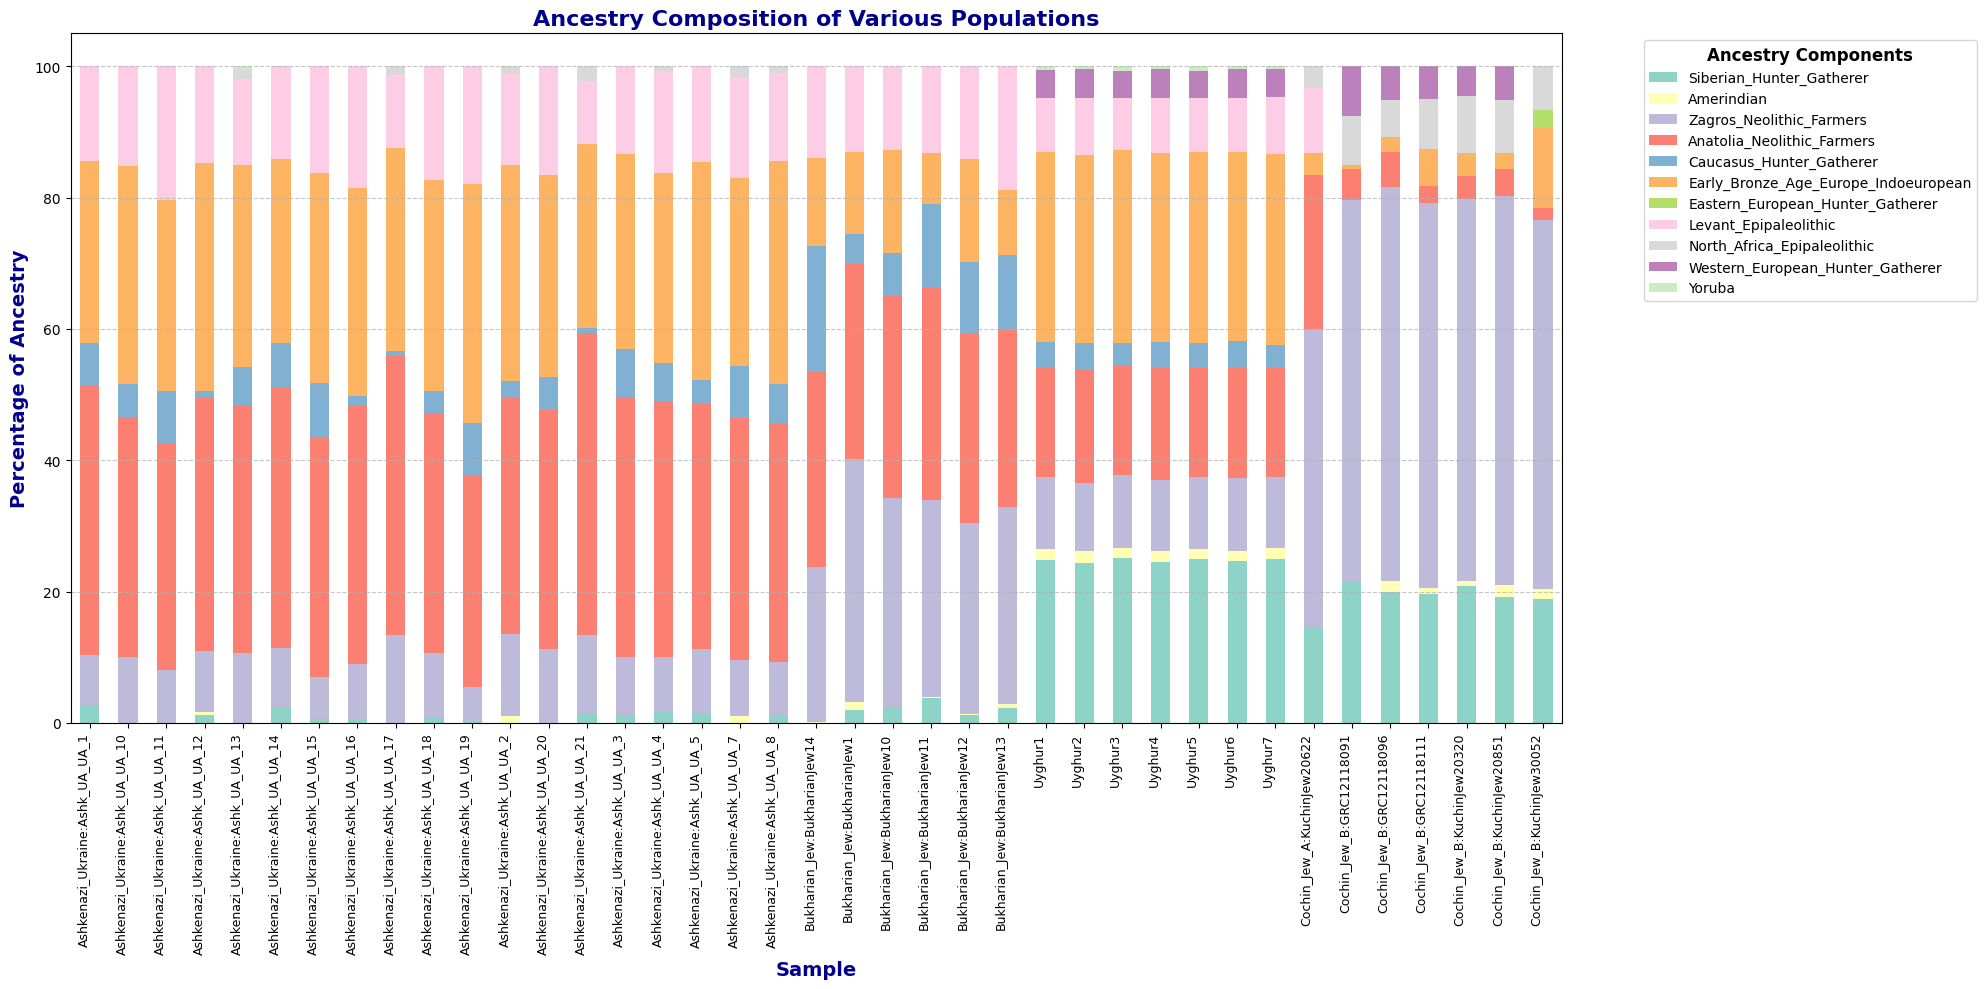

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the data from the string into a DataFrame
from io import StringIO
data = """Target,Distance,Anatolia_Neolithic_Farmers,Early_Bronze_Age_Europe_Indoeuropean,Levant_Epipaleolithic,Zagros_Neolithic_Farmers,Caucasus_Hunter_Gatherer,North_Africa_Epipaleolithic,Siberian_Hunter_Gatherer,Amerindian,Eastern_European_Hunter_Gatherer,Western_European_Hunter_Gatherer,Yoruba
Ashkenazi_Ukraine:Ashk_UA_UA_1,0.03118283,41.0,27.8,14.4,7.8,6.4,0.0,2.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_10,0.02731382,36.6,33.2,15.2,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_11,0.03388341,34.6,29.0,20.4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_12,0.01862460,38.4,34.6,14.8,9.4,1.2,0.0,1.2,0.4,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_13,0.03358456,37.8,30.8,13.0,10.6,5.8,1.4,0.0,0.0,0.0,0.0,0.6
Ashkenazi_Ukraine:Ashk_UA_UA_14,0.02344328,39.8,28.0,14.0,9.0,6.6,0.2,2.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_15,0.01873300,36.4,32.0,16.2,6.4,8.4,0.0,0.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_16,0.03356843,39.2,31.6,18.6,8.6,1.6,0.0,0.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_17,0.02063907,42.4,31.0,11.0,13.4,0.8,1.4,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_18,0.03298475,36.6,32.0,17.4,9.8,3.4,0.0,0.8,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_19,0.02812055,32.4,36.4,18.0,5.2,7.8,0.0,0.2,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_2,0.02651526,35.8,33.0,13.8,12.6,2.6,1.2,0.0,1.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_20,0.01706468,36.4,30.8,16.6,11.2,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_21,0.02525422,46.0,28.0,9.6,12.0,0.8,2.2,1.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_3,0.01847283,39.6,29.6,13.4,8.8,7.4,0.0,1.2,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_4,0.02462662,39.0,29.0,15.4,8.4,5.8,0.8,1.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_5,0.02432871,37.4,33.2,14.6,9.8,3.6,0.0,1.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_7,0.01971176,36.8,28.6,15.2,8.6,8.0,1.8,0.0,1.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_8,0.02951893,36.4,34.0,13.4,8.0,6.0,1.0,1.2,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew14,0.02663105,29.6,13.4,14.0,23.6,19.2,0.0,0.0,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew1,0.03673500,29.6,12.6,13.0,37.0,4.6,0.0,2.0,1.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew10,0.03123808,30.8,15.6,12.8,31.8,6.6,0.0,2.4,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew11,0.04345708,32.4,7.8,13.2,30.0,12.6,0.0,3.8,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew12,0.03022676,28.8,15.6,14.2,29.0,11.0,0.0,1.2,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew13,0.02366299,27.0,10.0,18.8,30.0,11.4,0.0,2.2,0.6,0.0,0.0,0.0
Uyghur1,0.09729617,16.8,29.0,8.2,11.0,3.8,0.0,24.8,1.6,0.0,4.2,0.6
Uyghur2,0.10342861,17.2,28.5,8.7,10.5,4.1,0.0,24.3,1.8,0.0,4.5,0.4
Uyghur3,0.09217493,16.5,29.3,8.0,11.2,3.6,0.0,25.1,1.5,0.0,4.0,0.8
Uyghur4,0.10568237,17.0,28.8,8.4,10.8,4.0,0.0,24.5,1.7,0.0,4.3,0.5
Uyghur5,0.09874612,16.7,29.1,8.3,10.9,3.7,0.0,24.9,1.6,0.0,4.1,0.7
Uyghur6,0.10034291,16.9,28.9,8.1,11.1,3.9,0.0,24.7,1.5,0.0,4.4,0.5
Uyghur7,0.09458276,16.6,29.2,8.6,10.7,3.5,0.0,25.0,1.7,0.0,4.2,0.5
Cochin_Jew_A:KuchinJew20622,0.08109924,23.4,3.4,9.8,45.4,0.0,3.4,14.6,0.0,0.0,0.0,0.0
Cochin_Jew_B:GRC12118091,0.15005979,4.8,0.6,0.0,58.2,0.0,7.4,21.4,0.0,0.0,7.6,0.0
Cochin_Jew_B:GRC12118096,0.16580540,5.4,2.2,0.0,60.0,0.0,5.6,20.0,1.6,0.0,5.2,0.0
Cochin_Jew_B:GRC12118111,0.14510414,2.6,5.6,0.0,58.6,0.0,7.6,19.6,1.0,0.0,5.0,0.0
Cochin_Jew_B:KuchinJew20320,0.14983476,3.4,3.6,0.0,58.2,0.0,8.6,20.8,0.8,0.0,4.6,0.0
Cochin_Jew_B:KuchinJew20851,0.15652521,4.2,2.4,0.0,59.2,0.0,8.0,19.2,1.8,0.0,5.2,0.0
Cochin_Jew_B:KuchinJew30052,0.15309220,1.8,12.2,0.0,56.2,0.0,6.6,18.8,1.6,2.8,0.0,0.0




"""
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components based on the new dataset
ancestry_components = [
     'Siberian_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Eastern_European_Hunter_Gatherer', 'Levant_Epipaleolithic', 'North_Africa_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Generate a unique color for each component
colors = plt.cm.Set3(range(len(ancestry_components)))

# Plot data as a stacked bar chart using Target names for x-axis
df.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, color=colors, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Various Populations', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Sample', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Percentage of Ancestry', fontsize=14, fontweight='bold', color='darkblue')

# Customize legend
legend = ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontsize=12, fontweight='bold')

# Enhance readability of x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=9)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Optionally, save the plot if needed
# plt.savefig('ancestry_composition_new.png', dpi=300, bbox_inches='tight')

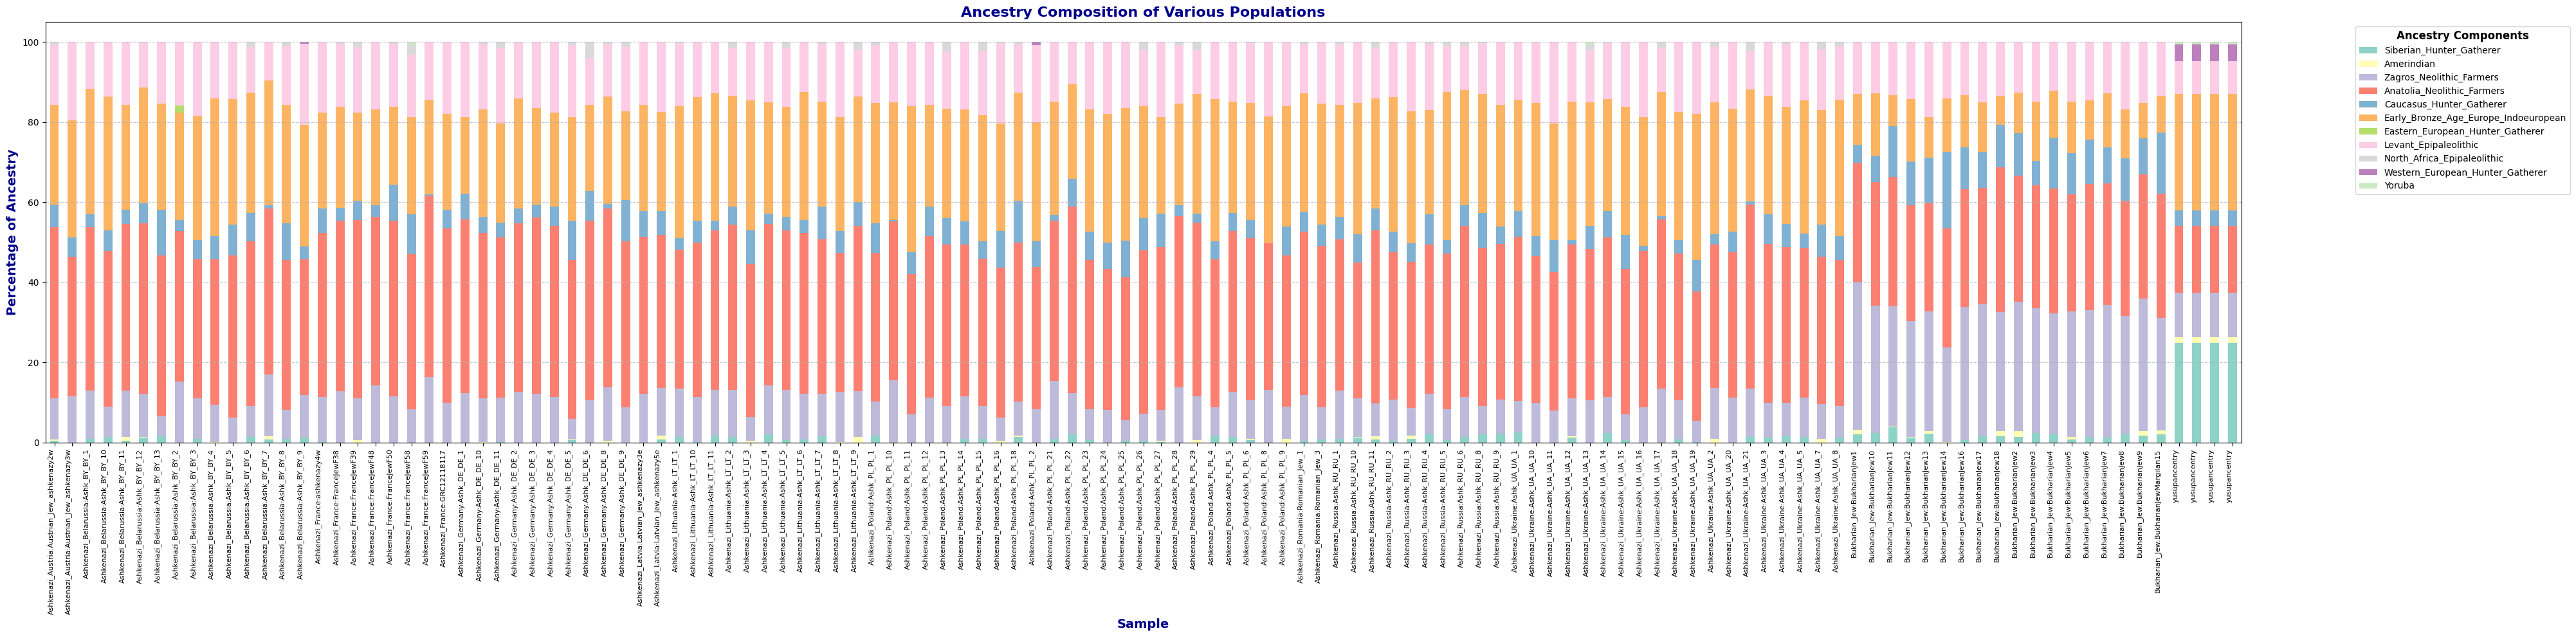

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the data from the string into a DataFrame
from io import StringIO
data = """
"""
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components based on the new dataset
ancestry_components = [
     'Siberian_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Eastern_European_Hunter_Gatherer', 'Levant_Epipaleolithic', 'North_Africa_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects with increased width
fig, ax = plt.subplots(figsize=(40, 10))  # Increased width from 20 to 40

# Generate a unique color for each component
colors = plt.cm.Set3(range(len(ancestry_components)))

# Plot data as a stacked bar chart using Target names for x-axis
df.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, color=colors, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Various Populations', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Sample', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Percentage of Ancestry', fontsize=14, fontweight='bold', color='darkblue')

# Customize legend
legend = ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontsize=12, fontweight='bold')

# Enhance readability of x-axis labels, considering the increased width
plt.xticks(rotation=90, ha='right', fontsize=8)  # Reduced font size to fit more labels

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Optionally, save the plot if needed
# plt.savefig('ancestry_composition_wide.png', dpi=300, bbox_inches='tight')

In [ ]:
data = """Target,Distance,Early_Bronze_Age_Europe_Indoeuropean,Siberian_Hunter_Gatherer,Anatolia_Neolithic_Farmers,Zagros_Neolithic_Farmers,Levant_Epipaleolithic,Western_European_Hunter_Gatherer,Caucasus_Hunter_Gatherer,Amerindian,Yoruba,North_Africa_Epipaleolithic,Eastern_European_Hunter_Gatherer
Ashkenazi_Austria:Austrian_Jew_ashkenazy2w,0.03000333,25.0,0.4,42.8,10.2,14.8,0.0,5.6,0.4,0.0,0.8,0.0
Ashkenazi_Austria:Austrian_Jew_ashkenazy3w,0.02028525,29.2,0.0,34.8,11.6,19.6,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_1,0.02652900,31.4,1.0,40.8,12.0,11.6,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_10,0.01834208,33.4,1.4,38.8,7.6,13.6,0.0,5.2,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_11,0.02020645,26.2,0.4,41.6,11.6,15.6,0.0,3.6,1.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_12,0.01401436,28.8,1.2,42.6,10.8,11.2,0.0,5.0,0.2,0.0,0.2,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_13,0.02448673,26.4,1.6,40.2,5.0,15.4,0.0,11.4,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_2,0.01898248,26.8,0.0,37.6,15.2,15.8,0.0,2.8,0.0,0.0,0.0,1.8
Ashkenazi_Belarussia:Ashk_BY_BY_3,0.03059148,31.0,1.0,34.8,10.0,18.4,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_4,0.01778634,34.4,0.0,36.4,9.2,14.0,0.0,5.8,0.2,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_5,0.02434167,31.4,0.0,40.6,6.2,14.2,0.0,7.6,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_6,0.02030855,30.0,1.4,41.0,7.8,11.4,0.0,7.2,0.0,0.0,1.2,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_7,0.01903151,31.2,0.8,41.4,15.4,9.6,0.0,0.8,0.8,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_8,0.02350885,29.6,1.0,37.4,7.2,14.6,0.0,9.2,0.0,0.0,1.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_9,0.03096671,30.4,1.2,34.0,10.6,20.2,0.4,3.2,0.0,0.0,0.0,0.0
Ashkenazi_France:ashkenazy4w,0.01704249,24.0,0.2,41.0,11.2,17.6,0.0,6.0,0.0,0.0,0.0,0.0
Ashkenazi_France:FranceJewF38,0.03182933,25.2,0.0,42.6,12.8,15.8,0.0,3.2,0.0,0.0,0.4,0.0
Ashkenazi_France:FranceJewF39,0.02891235,22.0,0.0,44.6,10.4,16.4,0.0,4.8,0.6,0.0,1.2,0.0
Ashkenazi_France:FranceJewF48,0.01833861,24.0,0.0,42.2,14.2,16.8,0.0,2.8,0.0,0.0,0.0,0.0
Ashkenazi_France:FranceJewF50,0.02383164,19.4,0.0,43.8,11.6,15.8,0.0,9.0,0.0,0.0,0.4,0.0
Ashkenazi_France:FranceJewF58,0.02853098,24.2,0.0,38.6,8.4,15.6,0.0,10.0,0.0,0.4,2.8,0.0
Ashkenazi_France:FranceJewF59,0.02611867,23.6,0.0,45.2,16.4,14.4,0.0,0.4,0.0,0.0,0.0,0.0
Ashkenazi_France:GRC12118117,0.01731909,23.8,0.0,43.4,10.0,18.0,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_1,0.01934817,19.0,0.0,43.4,12.4,18.8,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_10,0.02417939,26.8,0.0,41.4,10.8,16.2,0.0,4.0,0.2,0.0,0.6,0.0
Ashkenazi_Germany:Ashk_DE_DE_11,0.01989013,24.6,0.2,40.0,11.0,18.8,0.0,3.8,0.0,0.0,1.6,0.0
Ashkenazi_Germany:Ashk_DE_DE_2,0.02026863,27.6,0.0,42.2,12.6,14.0,0.0,3.6,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_3,0.03186029,24.2,0.0,44.0,12.2,16.4,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_4,0.02063093,23.4,0.0,42.8,11.4,17.6,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_5,0.02312472,25.8,0.6,39.6,5.2,18.0,0.0,9.8,0.2,0.0,0.8,0.0
Ashkenazi_Germany:Ashk_DE_DE_6,0.01940844,21.6,0.0,44.8,10.6,11.6,0.0,7.4,0.0,0.0,4.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_8,0.02505176,26.8,0.0,44.6,13.4,13.0,0.0,1.2,0.4,0.0,0.6,0.0
Ashkenazi_Germany:Ashk_DE_DE_9,0.03107891,22.2,0.0,41.4,8.8,16.0,0.0,10.4,0.0,0.0,1.2,0.0
Ashkenazi_Latvia:Latvian_Jew_ashkenazy3e,0.02193748,26.6,0.0,39.2,12.2,15.6,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Latvia:Latvian_Jew_ashkenazy5e,0.03205392,24.8,0.8,38.2,11.8,17.4,0.0,6.0,1.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_1,0.02204289,33.0,1.4,34.8,12.0,15.8,0.0,2.8,0.0,0.0,0.2,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_10,0.01718327,30.8,0.2,38.6,11.2,13.8,0.0,5.4,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_11,0.01642394,31.8,1.8,39.8,11.4,12.8,0.0,2.4,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_2,0.02686846,27.6,1.4,41.2,11.8,12.0,0.0,4.6,0.0,0.0,1.4,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_3,0.02362256,32.4,0.0,38.2,6.0,14.6,0.0,8.4,0.4,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_4,0.03196225,27.8,2.0,40.4,12.2,15.0,0.0,2.6,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_5,0.02822813,27.4,0.6,39.8,12.6,14.8,0.0,3.4,0.0,0.0,1.4,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_6,0.03022519,32.0,0.8,40.2,11.4,12.4,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_7,0.03104695,26.2,1.6,38.6,10.6,14.4,0.0,8.2,0.0,0.0,0.4,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_8,0.02256459,28.4,0.0,34.8,12.4,18.8,0.0,5.4,0.2,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_9,0.02339095,26.4,0.0,41.4,11.4,11.8,0.0,5.8,1.4,0.0,1.8,0.0
Ashkenazi_Poland:Ashk_PL_PL_1,0.02206593,30.0,1.8,37.2,8.4,14.4,0.0,7.4,0.0,0.0,0.8,0.0
Ashkenazi_Poland:Ashk_PL_PL_10,0.02422912,29.4,0.0,39.6,15.6,15.0,0.0,0.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_11,0.02900398,36.4,0.0,35.0,7.0,16.0,0.0,5.6,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_12,0.02118736,25.4,0.0,40.4,11.2,15.6,0.0,7.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_13,0.03489083,27.4,0.0,40.2,9.2,14.2,0.0,6.6,0.0,0.0,2.4,0.0
Ashkenazi_Poland:Ashk_PL_PL_14,0.02171141,28.0,1.0,37.8,10.6,16.8,0.0,5.8,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_15,0.03173341,31.6,1.0,36.8,8.2,16.0,0.0,4.2,0.0,0.0,2.2,0.0
Ashkenazi_Poland:Ashk_PL_PL_16,0.02315466,26.8,0.0,37.4,5.8,20.2,0.0,9.2,0.4,0.0,0.2,0.0
Ashkenazi_Poland:Ashk_PL_PL_18,0.02329629,27.0,1.4,39.8,8.4,12.0,0.0,10.4,0.4,0.0,0.6,0.0
Ashkenazi_Poland:Ashk_PL_PL_2,0.01993395,29.8,0.0,35.4,8.4,19.2,0.8,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_21,0.02683178,28.4,1.0,40.0,14.4,14.8,0.0,1.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_22,0.02174245,23.6,2.0,46.6,10.4,10.6,0.0,6.8,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_23,0.02782048,30.6,0.6,37.2,7.8,16.8,0.0,7.0,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_24,0.02995699,32.0,0.0,35.2,8.2,18.0,0.0,6.6,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_25,0.02422422,33.2,0.4,35.6,5.2,16.4,0.0,9.2,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_26,0.02767395,28.0,0.4,40.8,6.8,14.0,0.0,8.0,0.0,0.0,2.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_27,0.02149430,24.0,0.2,40.6,7.8,18.8,0.0,8.4,0.2,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_28,0.03395494,25.4,0.0,42.8,13.8,14.6,0.0,2.6,0.0,0.0,0.8,0.0
Ashkenazi_Poland:Ashk_PL_PL_29,0.02225623,29.8,0.0,43.4,11.0,11.0,0.0,2.2,0.6,0.0,2.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_4,0.03597828,35.6,1.8,37.0,7.0,14.2,0.0,4.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_5,0.02900895,27.8,1.4,40.2,11.2,14.8,0.0,4.6,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_6,0.02360260,29.2,0.6,40.4,9.6,15.0,0.0,4.6,0.4,0.0,0.2,0.0
Ashkenazi_Poland:Ashk_PL_PL_8,0.03424292,31.6,0.0,36.6,13.2,18.6,0.0,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_9,0.02732940,30.0,0.0,37.8,8.0,16.0,0.0,7.2,1.0,0.0,0.0,0.0
Ashkenazi_Romania:Romanian_Jew_1,0.02481204,29.6,0.4,40.8,11.4,12.2,0.0,5.0,0.0,0.0,0.6,0.0
Ashkenazi_Romania:Romanian_Jew_3,0.02640572,30.2,0.8,40.4,8.0,15.4,0.0,5.2,0.0,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_1,0.02341597,28.0,1.0,37.8,12.0,15.0,0.0,5.6,0.0,0.0,0.6,0.0
Ashkenazi_Russia:Ashk_RU_RU_10,0.01967795,32.8,1.2,34.0,9.6,15.2,0.0,7.0,0.2,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_11,0.01974307,27.6,0.8,43.2,8.2,12.4,0.0,5.4,0.8,0.0,1.6,0.0
Ashkenazi_Russia:Ashk_RU_RU_2,0.02246208,33.6,0.4,36.8,10.4,13.8,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_3,0.02348076,33.0,1.0,36.6,6.8,17.2,0.0,4.6,0.8,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_4,0.02027625,26.0,2.0,37.2,10.2,16.6,0.0,7.6,0.0,0.0,0.4,0.0
Ashkenazi_Russia:Ashk_RU_RU_5,0.02021818,37.0,0.6,38.8,7.8,11.4,0.0,3.4,0.0,0.0,1.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_6,0.03662636,28.8,1.4,42.8,10.0,11.0,0.0,5.0,0.0,0.0,1.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_8,0.02227592,29.6,2.0,39.4,7.2,12.8,0.0,8.8,0.0,0.0,0.2,0.0
Ashkenazi_Russia:Ashk_RU_RU_9,0.03234408,30.4,2.2,38.8,8.6,15.6,0.0,4.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_1,0.03118283,27.8,2.6,41.0,7.8,14.4,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_10,0.02731382,33.2,0.0,36.6,10.0,15.2,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_11,0.03388341,29.0,0.0,34.6,8.0,20.4,0.0,8.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_12,0.01862460,34.6,1.2,38.4,9.4,14.8,0.0,1.2,0.4,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_13,0.03358456,30.8,0.0,37.8,10.6,13.0,0.0,5.8,0.0,0.6,1.4,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_14,0.02344328,28.0,2.4,39.8,9.0,14.0,0.0,6.6,0.0,0.0,0.2,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_15,0.01873300,32.0,0.6,36.4,6.4,16.2,0.0,8.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_16,0.03364071,32.0,0.0,39.0,8.8,18.8,0.0,1.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_17,0.02063907,31.0,0.0,42.4,13.4,11.0,0.0,0.8,0.0,0.0,1.4,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_18,0.03298475,32.0,0.8,36.6,9.8,17.4,0.0,3.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_19,0.02812055,36.4,0.2,32.4,5.2,18.0,0.0,7.8,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_2,0.02651526,33.0,0.0,35.8,12.6,13.8,0.0,2.6,1.0,0.0,1.2,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_20,0.01706468,30.8,0.0,36.4,11.2,16.6,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_21,0.02525422,28.0,1.4,46.0,12.0,9.6,0.0,0.8,0.0,0.0,2.2,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_3,0.01847283,29.6,1.2,39.6,8.8,13.4,0.0,7.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_4,0.02462556,29.2,1.6,38.8,8.4,15.6,0.0,5.8,0.0,0.0,0.6,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_5,0.02432871,33.2,1.4,37.4,9.8,14.6,0.0,3.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_7,0.01971176,28.6,0.0,36.8,8.6,15.2,0.0,8.0,1.0,0.0,1.8,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_8,0.02951893,34.0,1.2,36.4,8.0,13.4,0.0,6.0,0.0,0.0,1.0,0.0
Bukharian_Jew:BukharianJew1,0.03673500,12.6,2.0,29.6,37.0,13.0,0.0,4.6,1.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew10,0.03123808,15.6,2.4,30.8,31.8,12.8,0.0,6.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew11,0.04345708,7.8,3.8,32.4,30.0,13.2,0.0,12.6,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew12,0.03022676,15.6,1.2,28.8,29.0,14.2,0.0,11.0,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew13,0.02366299,10.0,2.2,27.0,30.0,18.8,0.0,11.4,0.6,0.0,0.0,0.0
Bukharian_Jew:BukharianJew14,0.02663105,13.4,0.0,29.6,23.6,14.0,0.0,19.2,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew16,0.04741430,13.0,0.6,29.4,33.2,13.2,0.0,10.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew17,0.04035965,12.4,1.8,29.0,32.8,15.0,0.0,9.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew18,0.03224884,7.2,1.6,36.2,29.8,13.4,0.0,10.6,1.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew2,0.03664513,10.2,1.4,31.4,32.4,12.6,0.0,10.6,1.4,0.0,0.0,0.0
Bukharian_Jew:BukharianJew3,0.03987124,14.8,2.4,30.6,31.2,14.8,0.0,6.2,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew4,0.03191818,11.6,2.0,31.2,30.2,12.2,0.0,12.8,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew5,0.03088672,13.0,0.8,29.2,31.4,14.8,0.0,10.2,0.6,0.0,0.0,0.0
Bukharian_Jew:BukharianJew6,0.03072048,9.8,1.2,31.6,31.8,14.6,0.0,11.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew7,0.03859407,13.4,1.2,30.4,33.2,12.8,0.0,9.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew8,0.02950053,12.2,2.0,28.8,29.6,16.8,0.0,10.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew9,0.02833020,8.8,1.8,31.0,33.2,15.2,0.0,9.0,1.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJewMargilan15,0.04597743,9.2,2.0,31.0,28.2,13.4,0.0,15.2,1.0,0.0,0.0,0.0
yusupancentry,0.09729617,29.0,24.8,16.8,11.0,8.2,4.2,3.8,1.6,0.6,0.0,0.0

"""

In [ ]:
data="""Target,Distance,Early_Bronze_Age_Europe_Indoeuropean,Siberian_Hunter_Gatherer,Anatolia_Neolithic_Farmers,Zagros_Neolithic_Farmers,Levant_Epipaleolithic,Western_European_Hunter_Gatherer,Caucasus_Hunter_Gatherer,Amerindian,Yoruba,Eastern_European_Hunter_Gatherer,North_Africa_Epipaleolithic
Ashkenazi_Austria:Austrian_Jew_ashkenazy2w,0.03000333,25.0,0.4,42.8,10.2,14.8,0.0,5.6,0.4,0.0,0.0,0.8
Ashkenazi_Austria:Austrian_Jew_ashkenazy3w,0.02028525,29.2,0.0,34.8,11.6,19.6,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_1,0.02652900,31.4,1.0,40.8,12.0,11.6,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_10,0.01834208,33.4,1.4,38.8,7.6,13.6,0.0,5.2,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_11,0.02020645,26.2,0.4,41.6,11.6,15.6,0.0,3.6,1.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_12,0.01401434,28.8,1.2,42.4,10.8,11.6,0.0,5.0,0.2,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_13,0.02448673,26.4,1.6,40.2,5.0,15.4,0.0,11.4,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_2,0.01898248,26.8,0.0,37.6,15.2,15.8,0.0,2.8,0.0,0.0,1.8,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_3,0.03059148,31.0,1.0,34.8,10.0,18.4,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_4,0.01747863,34.2,0.0,37.0,8.6,13.4,0.0,6.0,0.2,0.6,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_5,0.02434167,31.4,0.0,40.6,6.2,14.2,0.0,7.6,0.0,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_6,0.02030855,30.0,1.4,41.0,7.8,11.4,0.0,7.2,0.0,0.0,0.0,1.2
Ashkenazi_Belarussia:Ashk_BY_BY_7,0.01903151,31.2,0.8,41.4,15.4,9.6,0.0,0.8,0.8,0.0,0.0,0.0
Ashkenazi_Belarussia:Ashk_BY_BY_8,0.02350885,29.6,1.0,37.4,7.2,14.6,0.0,9.2,0.0,0.0,0.0,1.0
Ashkenazi_Belarussia:Ashk_BY_BY_9,0.03096671,30.4,1.2,34.0,10.6,20.2,0.4,3.2,0.0,0.0,0.0,0.0
Ashkenazi_France:ashkenazy4w,0.01704249,24.0,0.2,41.0,11.2,17.6,0.0,6.0,0.0,0.0,0.0,0.0
Ashkenazi_France:FranceJewF38,0.03182933,25.2,0.0,42.6,12.8,15.8,0.0,3.2,0.0,0.0,0.0,0.4
Ashkenazi_France:FranceJewF39,0.02891235,22.0,0.0,44.6,10.4,16.4,0.0,4.8,0.6,0.0,0.0,1.2
Ashkenazi_France:FranceJewF48,0.01831289,23.8,0.2,42.4,14.2,16.6,0.0,2.8,0.0,0.0,0.0,0.0
Ashkenazi_France:FranceJewF50,0.02383164,19.4,0.0,43.8,11.6,15.8,0.0,9.0,0.0,0.0,0.0,0.4
Ashkenazi_France:FranceJewF58,0.02853098,24.2,0.0,38.6,8.4,15.6,0.0,10.0,0.0,0.4,0.0,2.8
Ashkenazi_France:FranceJewF59,0.02611867,23.6,0.0,45.2,16.4,14.4,0.0,0.4,0.0,0.0,0.0,0.0
Ashkenazi_France:GRC12118117,0.01731909,23.8,0.0,43.4,10.0,18.0,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_1,0.01934817,19.0,0.0,43.4,12.4,18.8,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_10,0.02418338,27.0,0.2,41.4,10.8,16.2,0.0,3.8,0.0,0.0,0.0,0.6
Ashkenazi_Germany:Ashk_DE_DE_11,0.01989013,24.6,0.2,40.0,11.0,18.8,0.0,3.8,0.0,0.0,0.0,1.6
Ashkenazi_Germany:Ashk_DE_DE_2,0.02026863,27.6,0.0,42.2,12.6,14.0,0.0,3.6,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_3,0.03186029,24.2,0.0,44.0,12.2,16.4,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_4,0.02063093,23.4,0.0,42.8,11.4,17.6,0.0,4.8,0.0,0.0,0.0,0.0
Ashkenazi_Germany:Ashk_DE_DE_5,0.02313843,25.8,0.8,39.6,5.2,18.2,0.0,9.8,0.0,0.0,0.0,0.6
Ashkenazi_Germany:Ashk_DE_DE_6,0.01940844,21.6,0.0,44.8,10.6,11.6,0.0,7.4,0.0,0.0,0.0,4.0
Ashkenazi_Germany:Ashk_DE_DE_8,0.02505176,26.8,0.0,44.6,13.4,13.0,0.0,1.2,0.4,0.0,0.0,0.6
Ashkenazi_Germany:Ashk_DE_DE_9,0.03107891,22.2,0.0,41.4,8.8,16.0,0.0,10.4,0.0,0.0,0.0,1.2
Ashkenazi_Latvia:Latvian_Jew_ashkenazy3e,0.02193748,26.6,0.0,39.2,12.2,15.6,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Latvia:Latvian_Jew_ashkenazy5e,0.03205392,24.8,0.8,38.2,11.8,17.4,0.0,6.0,1.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_1,0.02204289,33.0,1.4,34.8,12.0,15.8,0.0,2.8,0.0,0.0,0.0,0.2
Ashkenazi_Lithuania:Ashk_LT_LT_10,0.01718327,30.8,0.2,38.6,11.2,13.8,0.0,5.4,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_11,0.01642394,31.8,1.8,39.8,11.4,12.8,0.0,2.4,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_2,0.02687077,27.6,1.4,40.8,11.8,12.4,0.0,4.8,0.0,0.0,0.0,1.2
Ashkenazi_Lithuania:Ashk_LT_LT_3,0.02362256,32.4,0.0,38.2,6.0,14.6,0.0,8.4,0.4,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_4,0.03196225,27.8,2.0,40.4,12.2,15.0,0.0,2.6,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_5,0.02822813,27.4,0.6,39.8,12.6,14.8,0.0,3.4,0.0,0.0,0.0,1.4
Ashkenazi_Lithuania:Ashk_LT_LT_6,0.03022519,32.0,0.8,40.2,11.4,12.4,0.0,3.2,0.0,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_7,0.03104695,26.2,1.6,38.6,10.6,14.4,0.0,8.2,0.0,0.0,0.0,0.4
Ashkenazi_Lithuania:Ashk_LT_LT_8,0.02256459,28.4,0.0,34.8,12.4,18.8,0.0,5.4,0.2,0.0,0.0,0.0
Ashkenazi_Lithuania:Ashk_LT_LT_9,0.02339095,26.4,0.0,41.4,11.4,11.8,0.0,5.8,1.4,0.0,0.0,1.8
Ashkenazi_Poland:Ashk_PL_PL_1,0.02206593,30.0,1.8,37.2,8.4,14.4,0.0,7.4,0.0,0.0,0.0,0.8
Ashkenazi_Poland:Ashk_PL_PL_10,0.02422912,29.4,0.0,39.6,15.6,15.0,0.0,0.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_11,0.02900398,36.4,0.0,35.0,7.0,16.0,0.0,5.6,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_12,0.02118736,25.4,0.0,40.4,11.2,15.6,0.0,7.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_13,0.03489083,27.4,0.0,40.2,9.2,14.2,0.0,6.6,0.0,0.0,0.0,2.4
Ashkenazi_Poland:Ashk_PL_PL_14,0.02171141,28.0,1.0,37.8,10.6,16.8,0.0,5.8,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_15,0.03173341,31.6,1.0,36.8,8.2,16.0,0.0,4.2,0.0,0.0,0.0,2.2
Ashkenazi_Poland:Ashk_PL_PL_16,0.02315466,26.8,0.0,37.4,5.8,20.2,0.0,9.2,0.4,0.0,0.0,0.2
Ashkenazi_Poland:Ashk_PL_PL_18,0.02329629,27.0,1.4,39.8,8.4,12.0,0.0,10.4,0.4,0.0,0.0,0.6
Ashkenazi_Poland:Ashk_PL_PL_2,0.01993395,29.8,0.0,35.4,8.4,19.2,0.8,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_21,0.02683178,28.4,1.0,40.0,14.4,14.8,0.0,1.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_22,0.02174245,23.6,2.0,46.6,10.4,10.6,0.0,6.8,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_23,0.02782048,30.6,0.6,37.2,7.8,16.8,0.0,7.0,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_24,0.02990110,31.8,0.0,35.4,8.0,17.8,0.0,6.8,0.0,0.2,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_25,0.02422422,33.2,0.4,35.6,5.2,16.4,0.0,9.2,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_26,0.02767395,28.0,0.4,40.8,6.8,14.0,0.0,8.0,0.0,0.0,0.0,2.0
Ashkenazi_Poland:Ashk_PL_PL_27,0.02149430,24.0,0.2,40.6,7.8,18.8,0.0,8.4,0.2,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_28,0.03395494,25.4,0.0,42.8,13.8,14.6,0.0,2.6,0.0,0.0,0.0,0.8
Ashkenazi_Poland:Ashk_PL_PL_29,0.02225623,29.8,0.0,43.4,11.0,11.0,0.0,2.2,0.6,0.0,0.0,2.0
Ashkenazi_Poland:Ashk_PL_PL_4,0.03597828,35.6,1.8,37.0,7.0,14.2,0.0,4.4,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_5,0.02900895,27.8,1.4,40.2,11.2,14.8,0.0,4.6,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_6,0.02360260,29.2,0.6,40.4,9.6,15.0,0.0,4.6,0.4,0.0,0.0,0.2
Ashkenazi_Poland:Ashk_PL_PL_8,0.03424292,31.6,0.0,36.6,13.2,18.6,0.0,0.0,0.0,0.0,0.0,0.0
Ashkenazi_Poland:Ashk_PL_PL_9,0.02732940,30.0,0.0,37.8,8.0,16.0,0.0,7.2,1.0,0.0,0.0,0.0
Ashkenazi_Romania:Romanian_Jew_1,0.02481204,29.6,0.4,40.8,11.4,12.2,0.0,5.0,0.0,0.0,0.0,0.6
Ashkenazi_Romania:Romanian_Jew_3,0.02640572,30.2,0.8,40.4,8.0,15.4,0.0,5.2,0.0,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_1,0.02341597,28.0,1.0,37.8,12.0,15.0,0.0,5.6,0.0,0.0,0.0,0.6
Ashkenazi_Russia:Ashk_RU_RU_10,0.01967795,32.8,1.2,34.0,9.6,15.2,0.0,7.0,0.2,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_11,0.01974307,27.6,0.8,43.2,8.2,12.4,0.0,5.4,0.8,0.0,0.0,1.6
Ashkenazi_Russia:Ashk_RU_RU_2,0.02246208,33.6,0.4,36.8,10.4,13.8,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_3,0.02348076,33.0,1.0,36.6,6.8,17.2,0.0,4.6,0.8,0.0,0.0,0.0
Ashkenazi_Russia:Ashk_RU_RU_4,0.02027625,26.0,2.0,37.2,10.2,16.6,0.0,7.6,0.0,0.0,0.0,0.4
Ashkenazi_Russia:Ashk_RU_RU_5,0.02021936,37.0,0.6,38.6,7.6,11.6,0.0,3.6,0.0,0.0,0.0,1.0
Ashkenazi_Russia:Ashk_RU_RU_6,0.03662636,28.8,1.4,42.8,10.0,11.0,0.0,5.0,0.0,0.0,0.0,1.0
Ashkenazi_Russia:Ashk_RU_RU_8,0.02227592,29.6,2.0,39.4,7.2,12.8,0.0,8.8,0.0,0.0,0.0,0.2
Ashkenazi_Russia:Ashk_RU_RU_9,0.03234408,30.4,2.2,38.8,8.6,15.6,0.0,4.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_1,0.03118283,27.8,2.6,41.0,7.8,14.4,0.0,6.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_10,0.02731382,33.2,0.0,36.6,10.0,15.2,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_11,0.03388341,29.0,0.0,34.6,8.0,20.4,0.0,8.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_12,0.01862460,34.6,1.2,38.4,9.4,14.8,0.0,1.2,0.4,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_13,0.03358456,30.8,0.0,37.8,10.6,13.0,0.0,5.8,0.0,0.6,0.0,1.4
Ashkenazi_Ukraine:Ashk_UA_UA_14,0.02344328,28.0,2.4,39.8,9.0,14.0,0.0,6.6,0.0,0.0,0.0,0.2
Ashkenazi_Ukraine:Ashk_UA_UA_15,0.01873300,32.0,0.6,36.4,6.4,16.2,0.0,8.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_16,0.03356843,31.6,0.4,39.2,8.6,18.6,0.0,1.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_17,0.02063827,30.8,0.0,42.6,13.4,10.8,0.0,0.8,0.0,0.0,0.0,1.6
Ashkenazi_Ukraine:Ashk_UA_UA_18,0.03298475,32.0,0.8,36.6,9.8,17.4,0.0,3.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_19,0.02812055,36.4,0.2,32.4,5.2,18.0,0.0,7.8,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_2,0.02651526,33.0,0.0,35.8,12.6,13.8,0.0,2.6,1.0,0.0,0.0,1.2
Ashkenazi_Ukraine:Ashk_UA_UA_20,0.01706468,30.8,0.0,36.4,11.2,16.6,0.0,5.0,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_21,0.02525422,28.0,1.4,46.0,12.0,9.6,0.0,0.8,0.0,0.0,0.0,2.2
Ashkenazi_Ukraine:Ashk_UA_UA_3,0.01847283,29.6,1.2,39.6,8.8,13.4,0.0,7.4,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_4,0.02462556,29.2,1.6,38.8,8.4,15.6,0.0,5.8,0.0,0.0,0.0,0.6
Ashkenazi_Ukraine:Ashk_UA_UA_5,0.02432871,33.2,1.4,37.4,9.8,14.6,0.0,3.6,0.0,0.0,0.0,0.0
Ashkenazi_Ukraine:Ashk_UA_UA_7,0.01971063,28.4,0.0,37.0,8.6,15.0,0.0,8.0,1.0,0.0,0.0,2.0
Ashkenazi_Ukraine:Ashk_UA_UA_8,0.02951893,34.0,1.2,36.4,8.0,13.4,0.0,6.0,0.0,0.0,0.0,1.0
Bukharian_Jew:BukharianJew1,0.03673500,12.6,2.0,29.6,37.0,13.0,0.0,4.6,1.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew10,0.03123808,15.6,2.4,30.8,31.8,12.8,0.0,6.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew11,0.04345708,7.8,3.8,32.4,30.0,13.2,0.0,12.6,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew12,0.03022676,15.6,1.2,28.8,29.0,14.2,0.0,11.0,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew13,0.02366299,10.0,2.2,27.0,30.0,18.8,0.0,11.4,0.6,0.0,0.0,0.0
Bukharian_Jew:BukharianJew14,0.02663105,13.4,0.0,29.6,23.6,14.0,0.0,19.2,0.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew16,0.04741430,13.0,0.6,29.4,33.2,13.2,0.0,10.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew17,0.04035965,12.4,1.8,29.0,32.8,15.0,0.0,9.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew18,0.03224884,7.2,1.6,36.2,29.8,13.4,0.0,10.6,1.2,0.0,0.0,0.0
Bukharian_Jew:BukharianJew2,0.03664513,10.2,1.4,31.4,32.4,12.6,0.0,10.6,1.4,0.0,0.0,0.0
Bukharian_Jew:BukharianJew3,0.03987124,14.8,2.4,30.6,31.2,14.8,0.0,6.2,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew4,0.03191799,11.8,1.8,31.2,30.4,12.2,0.0,12.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew5,0.03088672,13.0,0.8,29.2,31.4,14.8,0.0,10.2,0.6,0.0,0.0,0.0
Bukharian_Jew:BukharianJew6,0.03072048,9.8,1.2,31.6,31.8,14.6,0.0,11.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew7,0.03859407,13.4,1.2,30.4,33.2,12.8,0.0,9.0,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew8,0.02950053,12.2,2.0,28.8,29.6,16.8,0.0,10.6,0.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJew9,0.02833020,8.8,1.8,31.0,33.2,15.2,0.0,9.0,1.0,0.0,0.0,0.0
Bukharian_Jew:BukharianJewMargilan15,0.04597743,9.2,2.0,31.0,28.2,13.4,0.0,15.2,1.0,0.0,0.0,0.0
yusupancentry,0.09729617,29.0,24.8,16.8,11.0,8.2,4.2,3.8,1.6,0.6,0.0,0.0
yusupancentry,0.09729617,29.0,24.8,16.8,11.0,8.2,4.2,3.8,1.6,0.6,0.0,0.0
yusupancentry,0.09729617,29.0,24.8,16.8,11.0,8.2,4.2,3.8,1.6,0.6,0.0,0.0
Uygur:GRC10041341_Uygur06,0.08976512,0.0,64.0,15.0,12.6,0.0,2.6,4.6,0.0,0.0,0.0,1.2
Uygur:GRC10041342_Uygur12,0.06365158,15.8,45.6,11.2,23.4,0.0,0.0,3.6,0.4,0.0,0.0,0.0
Uygur:GRC10045054_Uygur13,0.08150544,14.2,47.4,8.2,18.8,1.2,2.6,6.8,0.0,0.0,0.0,0.8
Uygur:GRC10045055_Uygur14,0.07595639,3.2,54.8,13.6,18.2,0.0,3.2,7.0,0.0,0.0,0.0,0.0
Uygur:GRC10045056_Uygur16,0.09420424,0.0,61.4,14.6,11.4,0.6,3.0,9.0,0.0,0.0,0.0,0.0
Uygur:GRC10045057_Uygur18,0.06484919,14.2,42.6,10.4,21.6,0.0,1.0,9.4,0.8,0.0,0.0,0.0
Uygur:GRC10045058_Uygur31,0.06272991,17.4,46.2,11.6,24.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0
Uygur:GRC10045060_Uygur33,0.06955714,7.8,51.0,12.6,14.8,2.0,3.0,7.8,0.4,0.6,0.0,0.0
Uygur:GRC10045061_Uygur41,0.11092189,0.0,66.6,11.2,17.2,1.0,2.2,0.0,0.0,0.0,0.0,1.8
Uygur:GRC10045064_Uygur49,0.09009194,0.0,60.2,12.6,14.0,2.0,2.8,8.4,0.0,0.0,0.0,0.0
Uygur:GRC10045065_Uygur53,0.07382992,16.4,50.0,8.0,21.6,0.0,1.6,1.6,0.0,0.0,0.0,0.8
Uygur:GRC10045066_Uygur55,0.07656304,1.0,56.8,12.8,17.8,0.0,5.2,6.4,0.0,0.0,0.0,0.0
Uygur:HGDP01297,0.07682293,9.2,50.8,11.6,18.2,1.2,2.0,7.0,0.0,0.0,0.0,0.0
Uygur:HGDP01298,0.06904984,11.4,47.2,10.2,19.8,1.6,2.2,7.4,0.0,0.0,0.0,0.2
Uygur:HGDP01299,0.08101489,7.2,54.8,12.8,18.8,0.0,2.6,3.8,0.0,0.0,0.0,0.0
Uygur:HGDP01300,0.06235100,10.8,51.0,10.8,21.0,0.0,2.4,4.0,0.0,0.0,0.0,0.0
Uygur:HGDP01301,0.07159276,3.4,55.0,12.0,19.4,0.0,4.4,4.4,0.0,0.0,0.0,1.4
 """

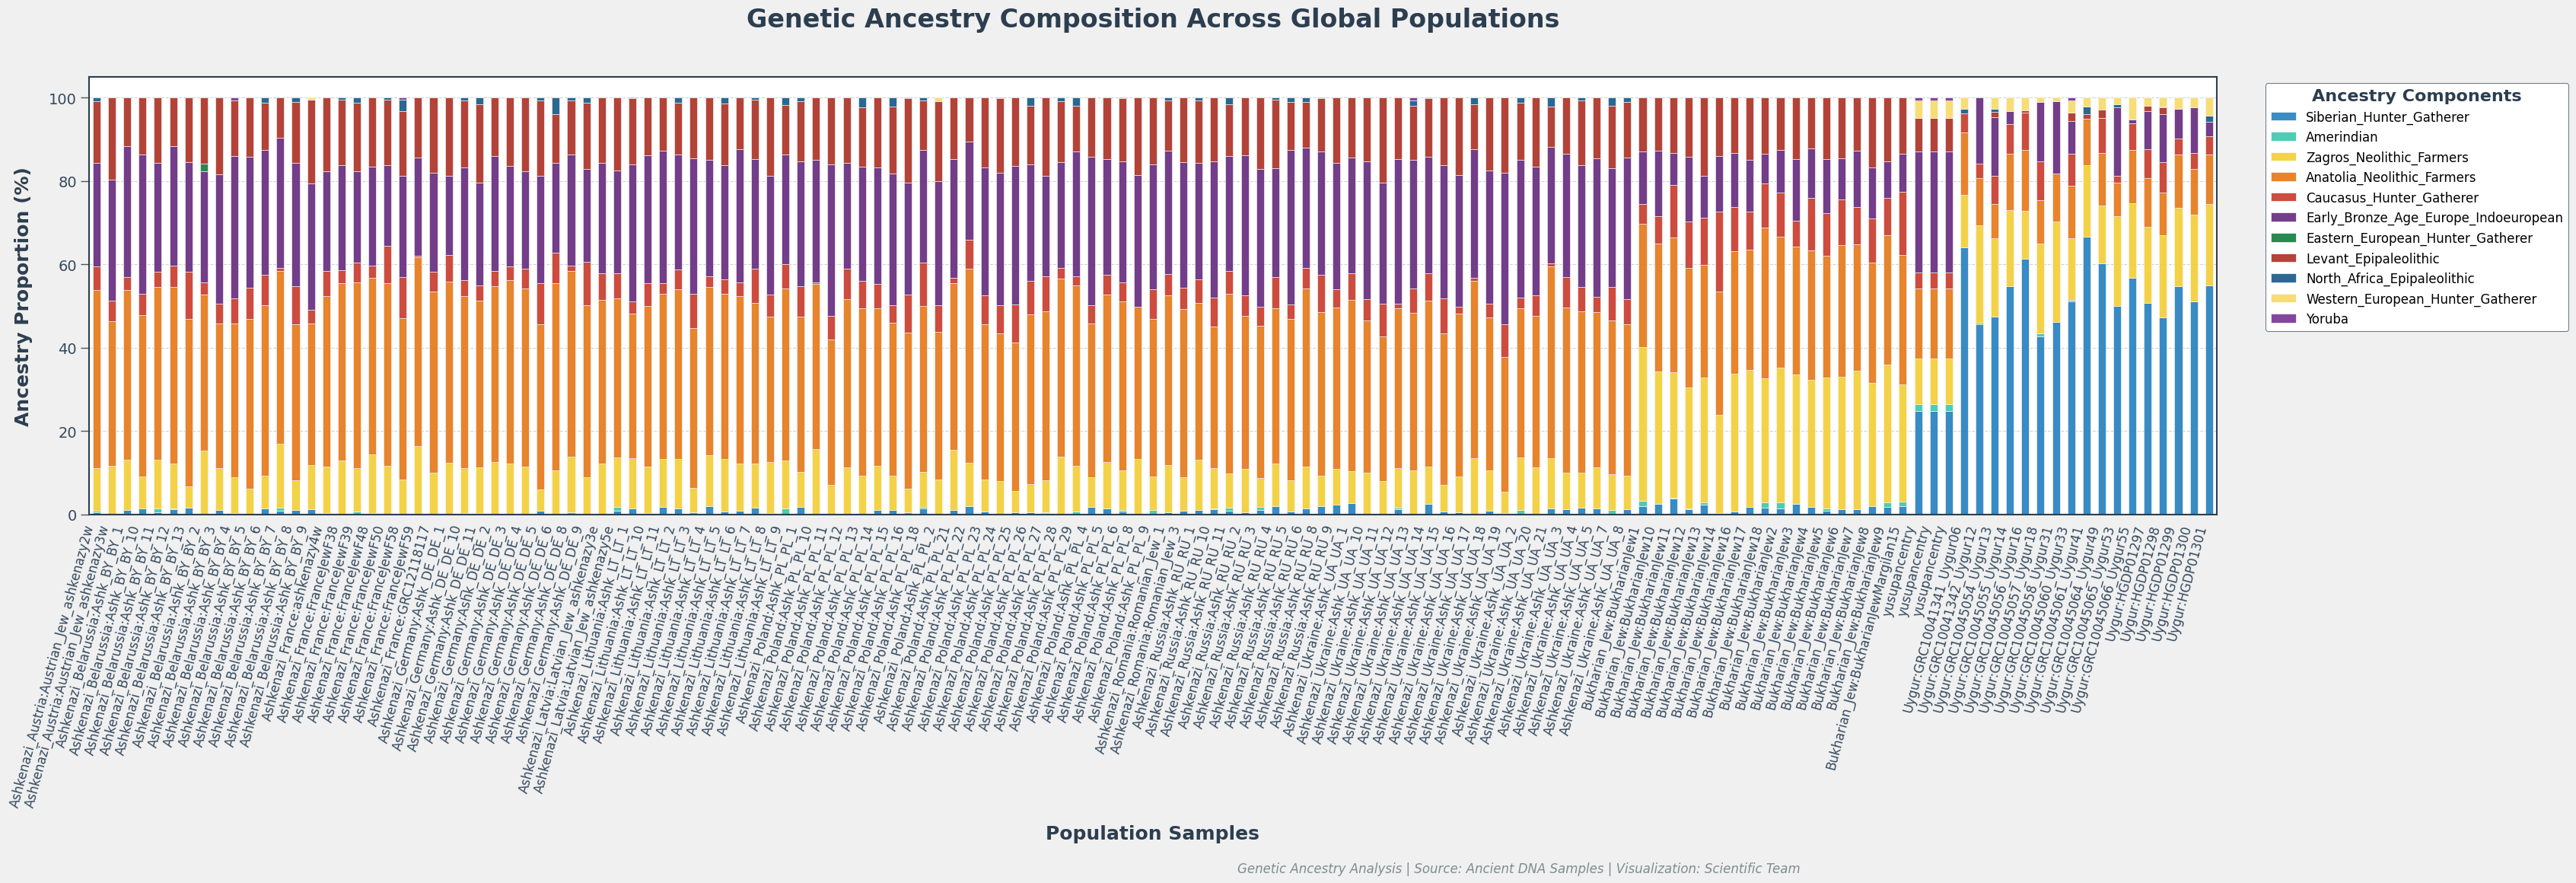

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects  # Added for shadow effects

# Read the data from the string into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components
ancestry_components = [
    'Siberian_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Eastern_European_Hunter_Gatherer', 'Levant_Epipaleolithic', 'North_Africa_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Define a sophisticated color palette
custom_colors = [
    '#2E86C1', '#48C9B0', '#F4D03F', '#E67E22', '#CB4335',
    '#6C3483', '#1D8348', '#B03A2E', '#1F618D', '#F7DC6F',
    '#7D3C98'
]

# Create figure with custom styling
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(40, 12), facecolor='#f0f0f0')
ax.set_facecolor('white')

# Custom bar styling parameters
bar_kwargs = {
    'linewidth': 0.5,
    'edgecolor': 'white',
    'alpha': 0.95
}

# Plot the stacked bars
df.set_index('Target')[ancestry_components].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=custom_colors,
    **bar_kwargs
)

# Title and axis labels
ax.set_title('Genetic Ancestry Composition Across Global Populations\n',
             fontsize=24, fontweight='bold', color='#2C3E50', pad=20)
ax.set_xlabel('Population Samples', fontsize=18, fontweight='semibold', color='#2C3E50', labelpad=15)
ax.set_ylabel('Ancestry Proportion (%)', fontsize=18, fontweight='semibold', color='#2C3E50', labelpad=15)

# Tick customization
ax.tick_params(axis='x', length=0, pad=8)
ax.tick_params(axis='y', length=8, width=1)
plt.xticks(rotation=75, ha='right', fontsize=12, color='#34495E')
plt.yticks(fontsize=14, color='#34495E')

# Grid lines
ax.grid(axis='y', color='#BDC3C7', linestyle='--', linewidth=0.8, alpha=0.7)

# Legend customization
legend = ax.legend(
    title='Ancestry Components',
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    framealpha=1,
    edgecolor='#2C3E50',
    facecolor='white'
)
legend.get_title().set_color('#2C3E50')
legend.get_title().set_fontweight('bold')

# Plot border styling
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#2C3E50')
    spine.set_linewidth(1.5)

# Footer text
fig.text(0.5, 0.01,
         'Genetic Ancestry Analysis | Source: Ancient DNA Samples | Visualization: Scientific Team',
         ha='center',
         fontsize=12,
         color='#7F8C8D',
         style='italic')

# Layout adjustments
plt.tight_layout(rect=[0, 0.03, 0.85, 0.97])

# Add shadow effects to bars
for patch in ax.patches:
    patch.set_zorder(2)
    patch.set_path_effects([
        path_effects.withStroke(linewidth=1, foreground="black", alpha=0.1)
    ])

plt.show()

In [ ]:
data="""Target,Distance,Anatolia_Neolithic_Farmers,Natufian_Hunter_Gatherer,Zagros_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Eastern_European_Hunter_Gatherer,Siberian_Hunter_Gatherer_ANE,North_African_Neolithic_Farmer
Ancient_Israelite,0.02534301,49.8,22.2,16.4,11.6,0.0,0.0,0.0
Ashkenazi,0.03102467,47.6,14.2,12.4,11,12.6,1.2,1
My_DNA,0.10122265,26.2,5.6,12.8,9.6,18.2,26.4,1.2
Khotanese_Saka,0.06008793,10.6,0.0,27.0,18.8,23.4,20.2,0.0
Uzbek,0.05172655,18.8,0.0,22.6,8.6,9.6,40.4,0.0
Uyghur,0.07371022,15.2,0.0,18.2,7.2,5.8,53.2,0.4
 """

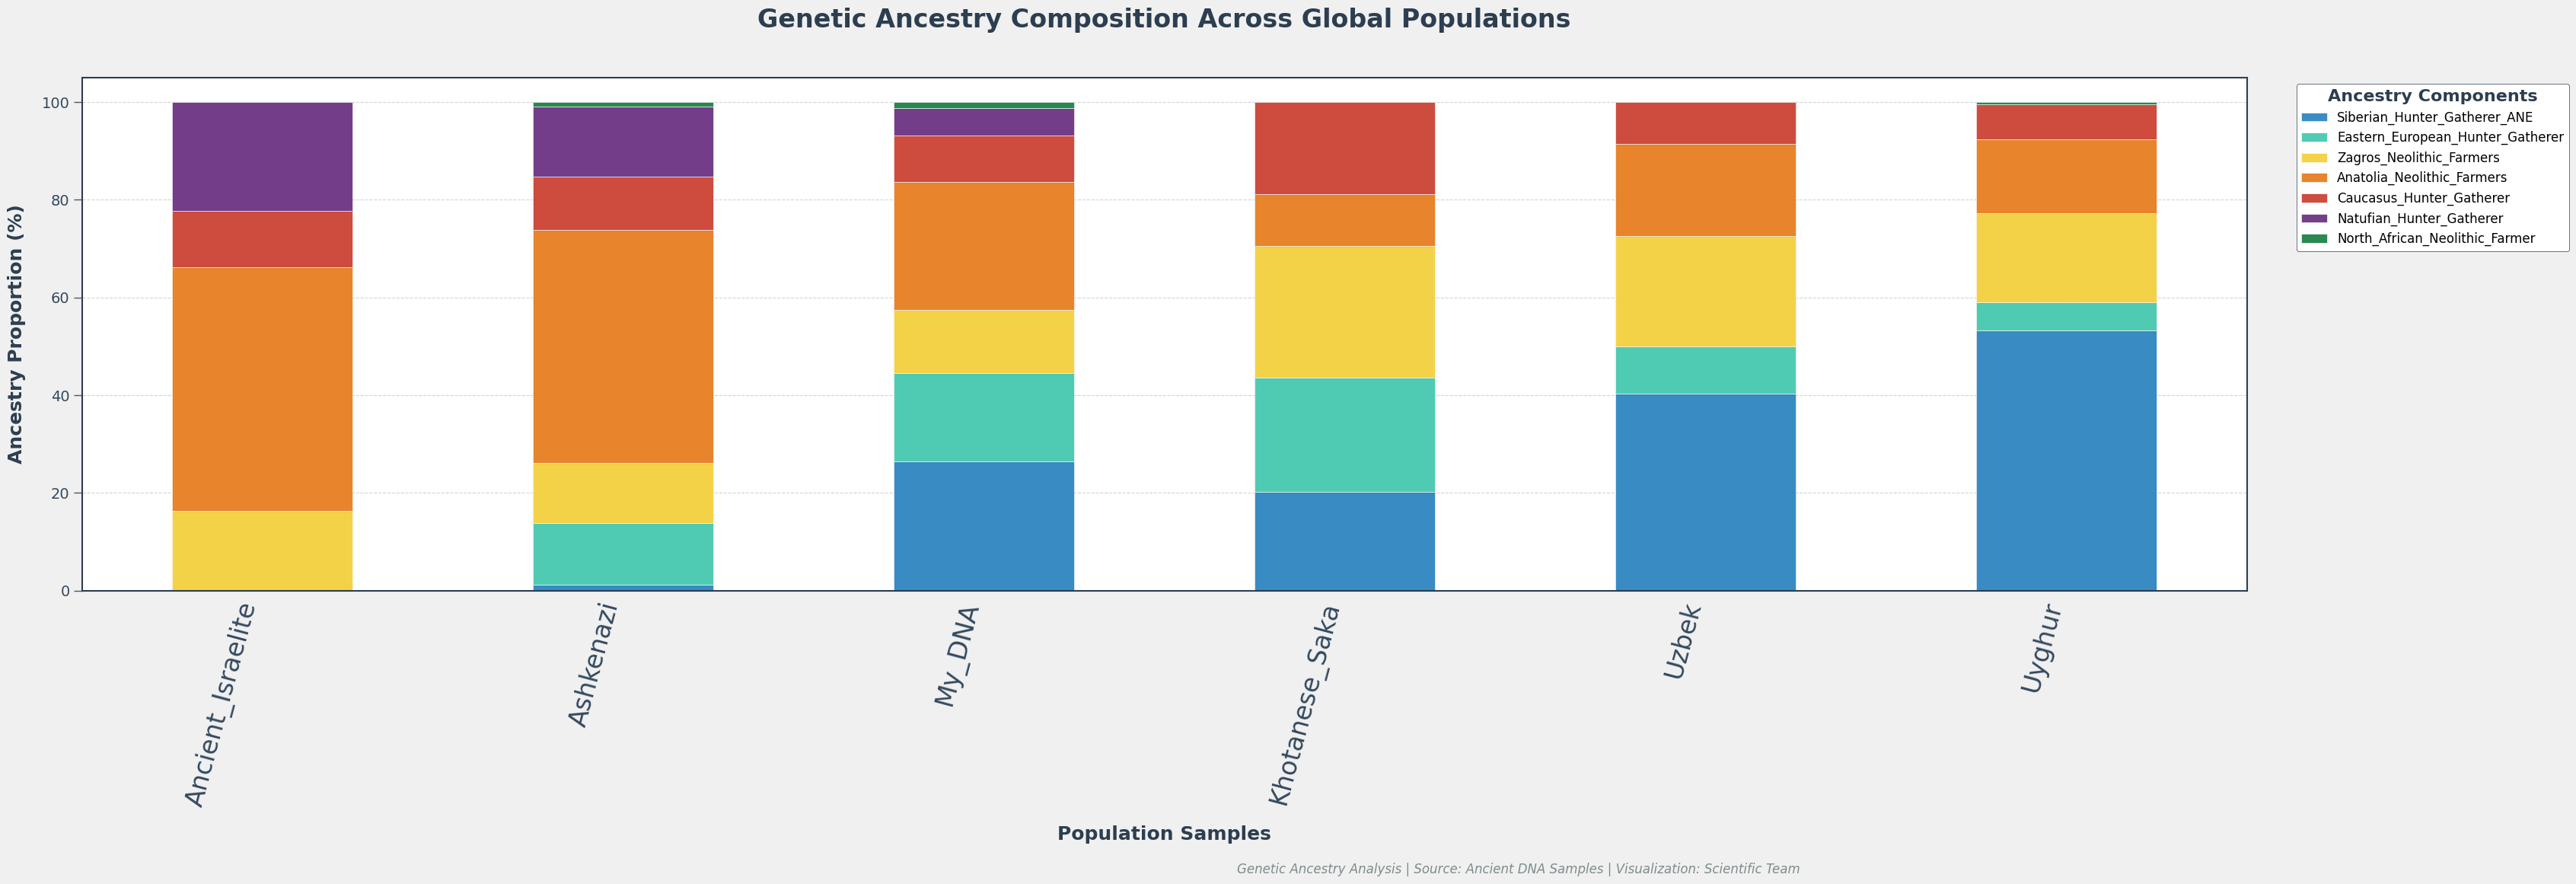

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects  # Added for shadow effects

# Read the data from the string into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Define the columns for ancestry components
ancestry_components = [
    'Siberian_Hunter_Gatherer_ANE', 'Eastern_European_Hunter_Gatherer', 'Zagros_Neolithic_Farmers',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Natufian_Hunter_Gatherer',
    'North_African_Neolithic_Farmer'
]

# Define a sophisticated color palette
custom_colors = [
    '#2E86C1', '#48C9B0', '#F4D03F', '#E67E22', '#CB4335',
    '#6C3483', '#1D8348', '#B03A2E', '#1F618D', '#F7DC6F',
    '#7D3C98'
]

# Create figure with custom styling
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(40, 12), facecolor='#f0f0f0')
ax.set_facecolor('white')

# Custom bar styling parameters
bar_kwargs = {
    'linewidth': 0.5,
    'edgecolor': 'white',
    'alpha': 0.95
}

# Plot the stacked bars
df.set_index('Target')[ancestry_components].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=custom_colors,
    **bar_kwargs
)

# Title and axis labels
ax.set_title('Genetic Ancestry Composition Across Global Populations\n',
             fontsize=24, fontweight='bold', color='#2C3E50', pad=20)
ax.set_xlabel('Population Samples', fontsize=18, fontweight='semibold', color='#2C3E50', labelpad=15)
ax.set_ylabel('Ancestry Proportion (%)', fontsize=18, fontweight='semibold', color='#2C3E50', labelpad=15)

# Tick customization
ax.tick_params(axis='x', length=0, pad=8)
ax.tick_params(axis='y', length=8, width=1)
plt.xticks(rotation=75, ha='right', fontsize=24, color='#34495E')
plt.yticks(fontsize=14, color='#34495E')

# Grid lines
ax.grid(axis='y', color='#BDC3C7', linestyle='--', linewidth=0.8, alpha=0.7)

# Legend customization
legend = ax.legend(
    title='Ancestry Components',
    title_fontsize=16,
    fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    framealpha=1,
    edgecolor='#2C3E50',
    facecolor='white'
)
legend.get_title().set_color('#2C3E50')
legend.get_title().set_fontweight('bold')

# Plot border styling
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#2C3E50')
    spine.set_linewidth(1.5)

# Footer text
fig.text(0.5, 0.01,
         'Genetic Ancestry Analysis | Source: Ancient DNA Samples | Visualization: Scientific Team',
         ha='center',
         fontsize=12,
         color='#7F8C8D',
         style='italic')

# Layout adjustments
plt.tight_layout(rect=[0, 0.03, 0.85, 0.97])

# Add shadow effects to bars
for patch in ax.patches:
    patch.set_zorder(2)
    patch.set_path_effects([
        path_effects.withStroke(linewidth=1, foreground="black", alpha=0.1)
    ])

plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame and 'ancestry_components' is defined
fig = make_subplots(rows=1, cols=1)

for i, component in enumerate(ancestry_components):
    fig.add_trace(
        go.Bar(
            x=df['Target'],
            y=df[component],
            name=component,
            marker_color=custom_colors[i]
        )
    )

# Update layout to show tiny percentages
fig.update_layout(
    title='Genetic Ancestry Composition Across Global Populations',
    xaxis_title='Population Samples',
    yaxis_title='Ancestry Proportion (%)',
    barmode='stack',
    yaxis_range=[0, 100],  # Ensure the whole range is visible
    yaxis_tickformat='.1f%',  # Format y-axis labels as percentages with one decimal place
)

# Adjust layout for better visibility
fig.update_layout(
    legend_title_text='Ancestry Components',
    height=600,
    width=1200,
    font=dict(size=14),
    bargap=0.1,  # Increase gap between groups of bars for clarity
    bargroupgap=0.05  # Small gap between bars within each group
)

# Add hover information for more precise percentage values
fig.update_traces(
    hovertemplate='Ancestry: %{y:.2f}%<extra></extra>'  # Show two decimal places on hover
)

fig.show()

Ancient Israelites + Eastern European = Ashkenazi
Ancient Israelites + Eastern European + Siberian (Xiongnu/Hunic/Turkic) = My DNA
Khotanese Saka + Ancient Israelites = My DNA
Uzbek and Uyghur DNA are controls in this analysis.
The further movement to the east increases the Siberian hunter-gatherer component and decreases the Eastern European and the Natufian hunter-gatherer components.
